<div class="alert alert-success">
<h2> <b> <font color=purple> Выпускной проект </b>
<font size="7">🎆</font></h2>
</div>

# Описание проекта

Исследовние технологического процесса производства стали. Оптимизация производственных расходов металлургического комбината: необходимо уменьшить потребление электроэнергии на этапе обработки стали. Предоставленны данные по измерениям температуры сплава и внесённых лигирующих добавках в процессе обработки стали. Модель машинного обучения должна предсказать температуру сплава стали в конце этапа обработки, что позволит оптимизировать процесс подогрева сплава стали и уменьшить потребление электроэнергии.

***Задача:***
Предсказать температуру сплава в конце процесса обработки стали (задача регресии).

***Используемые библиотеки:*** numpy, pandas, matplotlib, seaborn, ploty, sklearn, lightgbm, catboost, hyperopt, keras.

***Используемые инструменты:***
- Анализ и чистка данных (обработка пропусков и выбросов): describe, agg, groupby, apply, query, to_datetime, isnull, fillna, dropna, join, concat, ...;
- Проверка данных на мультиколлениарность: corr (heatmap), variance_inflation_factor (VIF анализ), SelectKBest (F-regression);
- Предобработка данных (разделение на выборки и масштабирование): train_test_split, StandardScaler;
- Построение моделей:
1. Линейная регрессии (LinearRegression);
2. K-ближайших соседей (KNeighborsRegressor);
3. Случайный лес (RandomForestRegressor);
4. Градиентный бустинг (LightGBM, CatBoost);
5. Нейросети (полносвязная сеть (maltylayer perceptron), сверточная сеть (convolution multylayer network), сеть с архитектурой LeNet);
- Кросс-валидация и настройка гиперпараметров (cross_val_score, GridSearchCV, RandomizedSearchCV, hyperopt);
- Анализ значимых признаков (RidgeCV, feature_importances, permutation_importance);
- Упаковка в пайплайн (Pipeline) нескольких шагов, упаковка в пайплайн несколько моделей, использование пайплайн совместно с кросс-валидацией и оптимизацией гиперпараметров.

#### Описание этапа обработки
Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша.

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

#### Описание данных
Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

# План проекта
**1. Проведение обзора данных (EDA)**

**Подготовка данных:**
* Импорт необходимых библиотек;
* Чтение файлов и сохранение полученных данных в переменные;
* Получение общей информации о таблицах (head, info, describe);
* Корректировка наименований столбцов (при необходимости).
* Выводы

**Анализ данных:**
* Графическое представление данных из таблиц;
* Проверка данных на аномалии.
* Выводы

**Предобработка данных:**
* Корректировка типов данных (при необходимости);
* Заполнение пропусков / удаление дубликатов (при наличии);
* Выделение признаков и таргета;
* Соединение таблиц.
* Выводы

**Исследование итоговой таблицы с данными:**
* Аналитический анализ
* графический анализ
* корреляционный анализ
* выводы

**2. Построение модели машинного обучения**

**Обучение модели:**
* Разделение данных на обучающую и тестовую выборки;
* Масштабирование данных;
* Обучение модели линейной регрессии;
* Обучение модели градиентного бустинга с перебором гиперпараметров;
* Константная модели.
* Выбор лучшей модели

**Проверка моделей:**
* Тестирование лучшей модели на тестовой выборке;
* Если MAE на тестовых данных > 6.8 - доработка модели.
* Анализ важности факторов

**3. Общий вывод**

___

# Импорт модулей и библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import time

from sklearn.model_selection import (cross_val_score,
                                     GridSearchCV,
                                     RandomizedSearchCV,
                                     train_test_split,
                                     KFold)
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import (LinearRegression,
                                  RidgeCV)
import lightgbm as lgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import (mean_absolute_error,
                             mean_squared_error,
                             make_scorer)
# from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
import hyperopt

from keras.models import (Sequential,
                         load_model)
from keras.layers import (Dense,
                         Conv1D,
                         Flatten,
                         AveragePooling1D as AvgPool1D)
from keras.utils import set_random_seed

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import logging
logging.disable(logging.CRITICAL)

In [ ]:
!pip install catboost -q
!pip install ipywidgets -q # !pip install "ipywidgets>=7, <8"
!juputer nbextension enable --py widgetsnbextention -q

from catboost import CatBoostRegressor, Pool, cv

/bin/bash: line 1: juputer: command not found


___

#Загрузка датасетов

In [ ]:
# Загрузим датасеты

try:
  data_arc = pd.read_csv("data_arc.csv")
  data_bulk = pd.read_csv("data_bulk.csv")
  # data_bulk_time = pd.read_csv("data_bulk_time.csv")
  data_gas = pd.read_csv("data_gas.csv")
  data_temp = pd.read_csv("data_temp.csv")
  data_wire = pd.read_csv("data_wire.csv")
  # data_wire_time = pd.read_csv("data_wire_time.csv")
except FileNotFoundError:
  data_arc = pd.read_csv(r"c:\datasets\final_steel\data_arc.csv")
  data_bulk = pd.read_csv("c:\datasets\final_steel\data_bulk.csv")
  data_bulk_time = pd.read_csv("c:\datasets\final_steel\data_bulk_time.csv")
  data_gas = pd.read_csv("c:\datasets\final_steel\data_gas.csv")
  data_temp = pd.read_csv("c:\datasets\final_steel\data_temp.csv")
  data_wire = pd.read_csv("c:\datasets\final_steel\data_wire.csv")
  data_wire_time = pd.read_csv("c:\datasets\final_steel\data_wire_time.csv")


# Загрузка с сервера яндекс выдаёт ошибку, раньше работало
# data = pd.read_csv('https://code.s3.yandex.net/datasets/final_steel/data_arc.csv')

In [ ]:
# # Создадим словарь: ключ - название датасета, значение - датасет.
# dataframes = {'data_arc': data_arc,
#               'data_bulk': data_bulk,
#               'data_bulk_time': data_bulk_time,
#               'data_gas': data_gas,
#               'data_temp': data_temp,
#               'data_wire': data_temp,
#               'data_wire_time': data_temp}

# # Посмотрим содержание датасетов.

# for name, df in dataframes.items():
#   print('\n', name)
#   print(df.shape)
#   print(df.info())


___

# Анализ и предобработка данных

## Анализ целевого признака

*Заметки:* <br>
Из описания задачи следует, что целевым признаком является конечная температура сплава стали.

In [ ]:
# Посмотрим датасет data_temp и общую информацию.

print(data_temp.head(3),'\n')
print(data_temp.info(), '\n')
print('Количество пропусков:', '\n', data_temp.isnull().sum())

   key         Время замера  Температура
0    1  2019-05-03 11:16:18       1571.0
1    1  2019-05-03 11:25:53       1604.0
2    1  2019-05-03 11:29:11       1618.0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB
None 

Количество пропусков: 
 key                0
Время замера       0
Температура     2901
dtype: int64


In [ ]:
# Оценним данные в столбце 'Температура'.

data_temp['Температура'].describe()

,Температура
count,13006.000000
mean,1591.840920
std,21.375851
min,1191.000000
25%,1581.000000
50%,1591.000000
75%,1601.000000
max,1705.000000


count    3216.000000
mean        4.946206
std         1.793169
min         1.000000
25%         4.000000
50%         5.000000
75%         6.000000
max        16.000000
Name: key, dtype: float64
Количество пустых партий: 0
Количество партий c одним измерением температура: 2


Text(0, 0.5, 'кол-во партий')

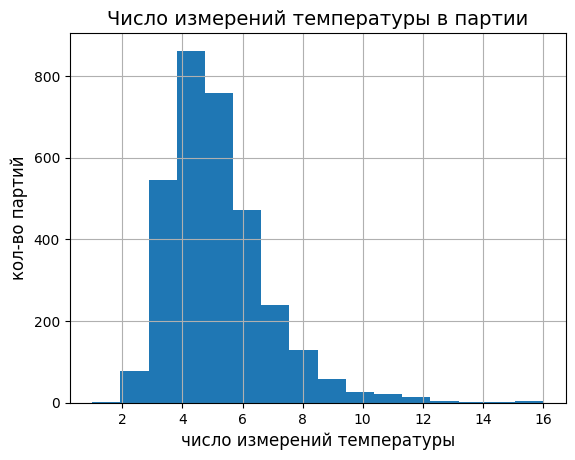

In [ ]:
# Сгрупируем данные по партиям (по ключу key) и посмотрим общую информацию.
key_group = data_temp.groupby('key')['key'].count()
print(key_group.describe())

# Проверим есть ли "пустые" партии, где в столбце температура все пропуски.
print('Количество пустых партий:', key_group[key_group == 0].sum())
# Проверим есть ли партии c одним измерением температура.
print('Количество партий c одним измерением температура:', key_group[key_group == 1].sum())

key_group.hist(bins=key_group.max(), xlabelsize=10, ylabelsize=10)
plt.title('Число измерений температуры в партии', size=14)
plt.xlabel('число измерений температуры', size=12)
plt.ylabel('кол-во партий', size=12)

*Заметки:*
- Целевым признаком является конечная температура;
- В среднем 5 замеров температуры в одной партии;
- В столбце 'Время замера' пропусков нет, а в столбце 'Температура' много (около 20%);
- Удалим пропуски (Пустых групп по ключу нет, поэтому пропуски можно заполнить предидущими по времени значениями внутри группы);
- Преобразуем тип данных в столбце 'Время замера' и отсортируем по возрастанию внутри групп;
- Есть строки с заметно более низкими значениями температуры - будем считать их выбросами и удалим, в качестве порога будем использовать температуру плавления стали равную примерно 1400 град;
- Наиболее важную информацию несёт начальная 'in_temp', будем использовать её в качестве обучающего признака;
- Собирём датасет: ['key', 'in_temp','out_temp'];
- Промежуточные замеры менее важны, но в качестве обучающего признака можно использовать минимальную и максимальную температуру внутри одной партии.

In [ ]:
# Преобразуем тип данных в столбце 'Время замера'.

data_temp['Время замера'] = pd.to_datetime(data_temp['Время замера'])

*Заметки:*
- При фильтрации выбросов используя query('Температура > 1400') строки с пропусками автоматически удаляться, поэтому сначало нужно заполнить пропуски;
- Если заполнить пропуски соседней температурой, то требуемая по условию метрика MAE недостижима;
- Можно для наглядности сначало удалить пропуски используя dropna.

In [ ]:
# # Отсортируем строки по времени внутри группы и заполним пропуски предыдущим значением.

# data_temp_filled = data_temp.groupby('key').apply(lambda x: x.sort_values(by='Время замера').fillna(method='ffill'))

# print('Количество пропусков в колонке Температура:', data_temp_filled['Температура'].isnull().sum())

# # Посмотрим на выбросы с температурой ниже 1400 град.

# outliers = data_temp_filled[data_temp_filled['Температура'] < 1400]
# print('Количество выбросов:', len(outliers))

# # Удалим строки с выбросами.

# clean_data_temp = data_temp_filled.query('Температура > 1400')

In [ ]:
# Удалим пропуски

clean_data_temp = data_temp.dropna()

In [ ]:
# Посмотрим на выбросы с температурой ниже 1400 град.

outliers = clean_data_temp[data_temp['Температура'] < 1400]
print('Количество выбросов:', len(outliers))

# Удалим строки с выбросами.

clean_data_temp = clean_data_temp.query('Температура > 1400')

print('Размер датасета:', clean_data_temp.shape)

Количество выбросов: 7
Размер датасета: (12999, 3)


Колличество партий приготовленого сплава: 2475


array([[<Axes: title={'center': 'in_temp'}>,
        <Axes: title={'center': 'out_temp'}>]], dtype=object)

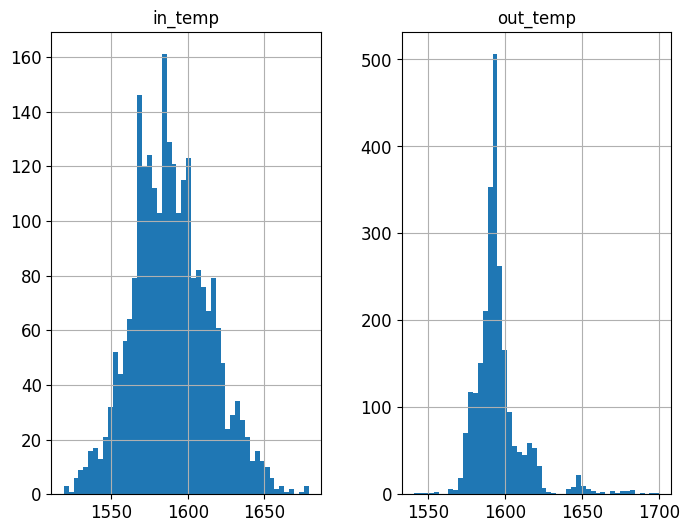

In [ ]:
# Собирём датасет data_in_out_temp, где in_temp - начальная температура сплава, я out_temp - конечная

data_in_out_temp = pd.DataFrame(columns=['key', 'in_temp','out_temp'])

for key in sorted(clean_data_temp.key.unique().tolist()):
  index = clean_data_temp[clean_data_temp.key == key]['Время замера'].sort_values().index
  if len(index) > 1:  # Отбросим строки с одним измерением температуры.
    row = {'key' : key,
          'in_temp' : clean_data_temp.loc[index[0]]['Температура'],
          'out_temp' : clean_data_temp.loc[index[-1]]['Температура']
          }
    data_in_out_temp.loc[len(data_in_out_temp.index)] = row

data_in_out_temp.set_index('key', inplace=True)

print('Колличество партий приготовленого сплава:', data_in_out_temp.shape[0])

# Построим гистограммы для in_temp и out_temp.
data_in_out_temp[['in_temp', 'out_temp']].hist(figsize=(8,6), bins=50,
                                               xlabelsize=12, ylabelsize=12)

In [ ]:
data_in_out_temp[['in_temp', 'out_temp']].describe()

,in_temp,out_temp
count,2475.000000,2475.000000
mean,1589.029899,1595.336162
std,24.998058,16.023153
min,1519.000000,1541.000000
25%,1572.000000,1587.000000
50%,1588.000000,1593.000000
75%,1605.000000,1599.000000
max,1679.000000,1700.000000


In [ ]:
# # Собирём датасет data_in_out_min_max_temp.

# data_in_out_min_max_temp = pd.DataFrame(columns=['key', 'in_temp','out_temp', 'max_temp', 'min_temp'])

# for key in sorted(clean_data_temp.key.unique().tolist()):
#   index = clean_data_temp[clean_data_temp.key == key]['Время замера'].sort_values().index
#   row = {'key' : key,
#           'in_temp' : clean_data_temp.loc[index[0]]['Температура'],
#           'out_temp' : clean_data_temp.loc[index[-1]]['Температура'],
#          'max_temp': clean_data_temp[clean_data_temp.key==key]['Температура'].max(),
#          'min_temp': clean_data_temp[clean_data_temp.key==key]['Температура'].min(),
#           }
#   data_in_out_min_max_temp.loc[len(data_in_out_min_max_temp.index)] = row

# data_in_out_min_max_temp.set_index('key', inplace=True)

# # Построим гистограммы.

# data_in_out_min_max_temp[['in_temp', 'out_temp', 'min_temp', 'max_temp']].hist(bins=50)

# print('Колличество законченных циклов приготовления сплава:', data_in_out_min_max_temp.shape[0])
# print('Количество групп, где начальная и конечная температуры совпадают:',\
#       data_in_out_min_max_temp[data_in_out_min_max_temp.in_temp == data_in_out_min_max_temp.out_temp].shape[0])
# print('Количество групп, где начальная температура совпадает с минимальной:',\
#       data_in_out_min_max_temp[data_in_out_min_max_temp.in_temp != data_in_out_min_max_temp.min_temp].shape[0])
# print('Количество групп, где конечная температура совпадает с максимальной:',\
#       data_in_out_min_max_temp[data_in_out_min_max_temp.min_temp != data_in_out_min_max_temp.max_temp].shape[0])

**Выводы:**
- Всего имеем 2475 партий приготовления сплава;
- В среднем каждая партия имеет 5 этапов, максимально - 16;
- Собрали датасет [номер партии, начальная температура, конечная температура], промежуточные замеры температуры отбросили.
- Распределения начальной температуры близко к нормальному, что видно из графика и о чём свидетельствует равенство среднего и медианы;
- Распределения конечной температуры также близко к нормальному, но имеет длинный хвост вправо.

## Анализ признаков

*Заметки:*<br>
На каждом этапе могли подогревать дугой, продувать газом после внесения проволки или сыпучих добавок. У некоторых этапов могут отсутствовать какие-то шаги, поэтому логично использовать leftjoin к таблице с целевым признаком, а потом заменить наны на ноль.

### Данные об электродах

In [ ]:
# Посмотрим датасет data_arc и общую информацию.

print(data_arc.head(3),'\n')
print(data_arc.info(), '\n')
print('Количество пропусков:', data_arc.isnull().sum()[0])

   key Начало нагрева дугой  Конец нагрева дугой  Активная мощность  \
0    1  2019-05-03 11:02:14  2019-05-03 11:06:02           0.976059   
1    1  2019-05-03 11:07:28  2019-05-03 11:10:33           0.805607   
2    1  2019-05-03 11:11:44  2019-05-03 11:14:36           0.744363   

   Реактивная мощность  
0             0.687084  
1             0.520285  
2             0.498805   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB
None 

Количество пропусков: 0


In [ ]:
data_arc[['Активная мощность', 'Реактивная мощность']].describe()

,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000
mean,0.670441,0.452592
std,0.408159,5.878702
min,0.030002,-715.504924
25%,0.395297,0.290991
50%,0.555517,0.415962
75%,0.857034,0.637371
max,3.731596,2.676388


*Заметки:*
- Пропусков нет;
- Есть выбросы в столбце реактивная мощность, заменим пропорционально активной мощности;
- Добавим столбец 'duration' с продолжительностью нагрева дуги D в секундах;
- Добавим столбец 'power' с полной мощностью P = (АМ^2 + РМ^2)^0.5;
- Добавим столбец 'work' с совершённой работой A = P*D;
- Собирём таблицу data_arc_group [key, duration, power, work], сгрупируем её по номеру партии key и просумируем;
- Добавим столбец 'work' к data_in_out_temp по партиям (ключам), которые есть в обеих таблицах, получим общую таблицу data.

In [ ]:
# В таблице data_arc в столбце 'Реактивная мощность' есть один выброс с отрицательным значением.

data_arc[data_arc[data_arc.columns[4]] < 0]

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
9780,2116,2019-07-24 00:44:48,2019-07-24 00:46:37,0.495782,-715.504924


In [ ]:
print(data_arc[data_arc.key == 2116][['key', 'Активная мощность', 'Реактивная мощность']])

       key  Активная мощность  Реактивная мощность
9778  2116           0.433266             0.306141
9779  2116           0.620265             0.408352
9780  2116           0.495782          -715.504924
9781  2116           0.299368             0.198796


In [ ]:
# Заменим выброс пропорцианально предыдущему значению

data_arc.loc[9780, 'Реактивная мощность'] = (data_arc.loc[9780, 'Активная мощность']*data_arc.loc[9779, 'Реактивная мощность']/
                                                        data_arc.loc[9779, 'Активная мощность'])

print(data_arc[data_arc.key == 2116][['key', 'Активная мощность', 'Реактивная мощность']])

       key  Активная мощность  Реактивная мощность
9778  2116           0.433266             0.306141
9779  2116           0.620265             0.408352
9780  2116           0.495782             0.326399
9781  2116           0.299368             0.198796


array([[<Axes: title={'center': 'Активная мощность'}>,
        <Axes: title={'center': 'Реактивная мощность'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'power'}>]], dtype=object)

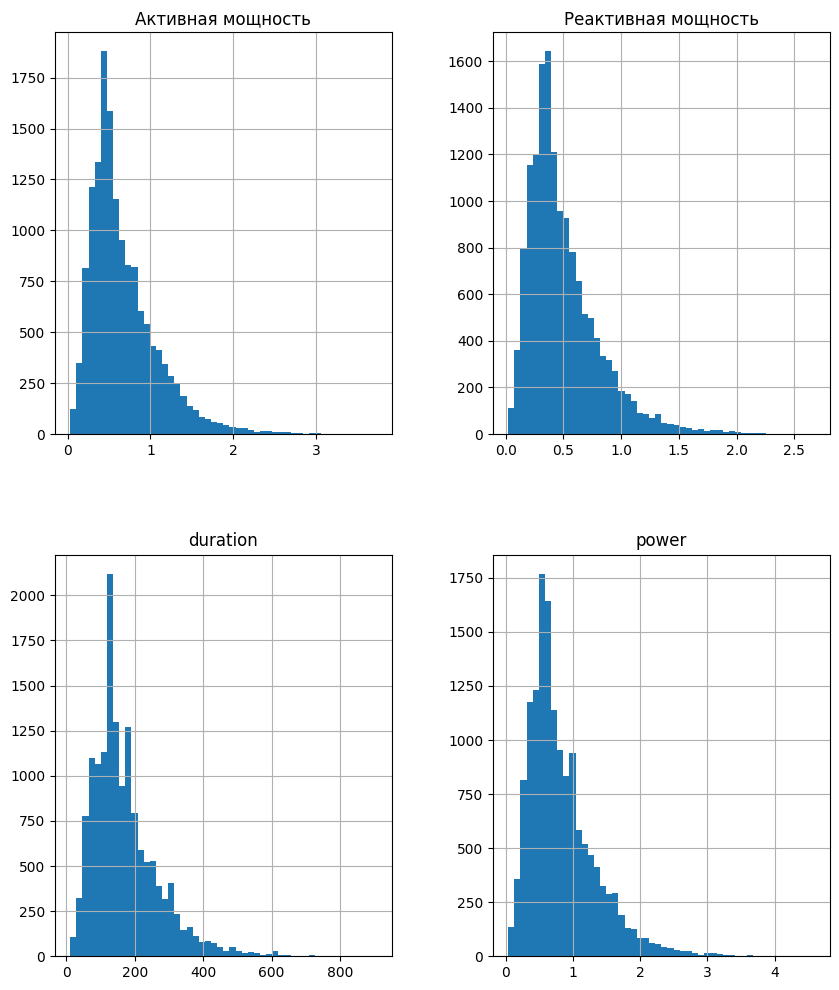

In [ ]:
# Добавим к data_arc столбец с продолжительностью нагрева дуги.

pd.to_datetime(data_arc[data_arc.columns[1]])
data_arc['duration'] = (pd.to_datetime(data_arc[data_arc.columns[2]]) -
                        pd.to_datetime(data_arc[data_arc.columns[1]])).dt.seconds

# Добавим столбец с полной мощностью (P = (АМ^2 + РМ^2)^0.5).

data_arc['power'] =((data_arc['Активная мощность']**2 +
                                data_arc['Реактивная мощность']**2)**.5).round(2)

# Добавим столбец work c совершённой работой.

data_arc['work'] = (data_arc.power*data_arc.duration).round()

# Построим гистограммы для столбцов 'Активная мощность', 'Реактивная мощность', 'duration' и 'power'.
data_arc[data_arc.columns[3:7]].hist(figsize=(10,12), bins=50)

In [ ]:
# Просуммируем совершённую работу и сгруппируем по партиям.

data_arc_group= data_arc.groupby('key').agg('sum')[['duration',	'power',	'work']]

# pd.pivot_table(data_arc, index=['key'], values=['duration', 'power', 'work'], aggfunc='sum')

print(data_arc_group.head(5))

     duration  power    work
key                         
1        1098   5.83  1443.0
2         811   3.65   881.0
3         655   2.99   527.0
4         741   3.82   798.0
5         869   4.03  1199.0


In [ ]:
# Добавим столбец work к общему датафрейму
# Объединеним по ключам, которые есть в обоих таблицах.
# (Изначально использовал left по ключу из таблицы с целевым признаком, но наставник рекомендовал join)

data = data_in_out_temp.join(data_arc_group['work'], how='inner')

print('Колличество партий в общем датасете:', data.shape[0], '\n')
print(data.head(3))


Колличество партий в общем датасете: 2475 

     in_temp  out_temp    work
key                           
1     1571.0    1613.0  1443.0
2     1581.0    1602.0   881.0
3     1596.0    1599.0   527.0


---

### Данные о продувке газом

---

In [ ]:
# Посмотрим датасет data_gas и общую информацию.

print(data_gas.head(3),'\n')
print(data_gas.info(), '\n')
print('Количество пропусков:', data_gas.isnull().sum()[0])

   key      Газ 1
0    1  29.749986
1    2  12.555561
2    3  28.554793 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB
None 

Количество пропусков: 0


Text(0, 0.5, 'кол-во значений')

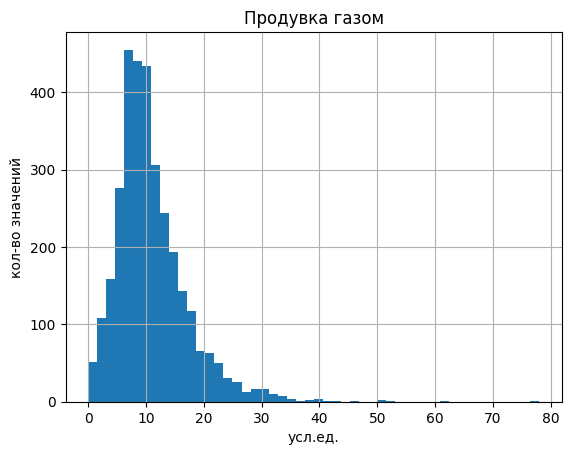

In [ ]:
# Построим гистограмму.

data_gas['Газ 1'].hist(bins=50)

plt.title('Продувка газом')
plt.xlabel('усл.ед.')
plt.ylabel('кол-во значений')

In [ ]:
# Округлим данные
data_gas['Газ 1'] = data_gas['Газ 1'].round(2)

# Зададим номер партии как индекс

data_gas.set_index('key', inplace=True)

# Переименнуем столбец

data_gas.columns = ['gas']

data_gas.head(3)

,gas
key,
1,29.75
2,12.56
3,28.55


In [ ]:
# Добавим столбец work к общему датафрейму
# Объединение по ключам, которые есть в обоих таблицах.

data = data.join(data_gas, how='inner')

data.shape, data.head(3)

((2473, 4),
      in_temp  out_temp    work    gas
 key                                  
 1     1571.0    1613.0  1443.0  29.75
 2     1581.0    1602.0   881.0  12.56
 3     1596.0    1599.0   527.0  28.55)

---

### Сыпучие добавки

In [ ]:
# Посмотрим датасет data_bulk и общую информацию.

print(data_bulk.head(3),'\n')
print(data_bulk.info(), '\n')
print('Количество пропусков:', '\n', data_bulk.isnull().sum())

   key  Bulk 1  Bulk 2  Bulk 3  Bulk 4  Bulk 5  Bulk 6  Bulk 7  Bulk 8  \
0    1     NaN     NaN     NaN    43.0     NaN     NaN     NaN     NaN   
1    2     NaN     NaN     NaN    73.0     NaN     NaN     NaN     NaN   
2    3     NaN     NaN     NaN    34.0     NaN     NaN     NaN     NaN   

   Bulk 9  Bulk 10  Bulk 11  Bulk 12  Bulk 13  Bulk 14  Bulk 15  
0     NaN      NaN      NaN    206.0      NaN    150.0    154.0  
1     NaN      NaN      NaN    206.0      NaN    149.0    154.0  
2     NaN      NaN      NaN    205.0      NaN    152.0    153.0   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null

In [ ]:
# Собирём таблицу по колличеству раз и объему внесенных типов добавок

bulk_summary = data_bulk.apply(['count', 'sum', 'mean']).T
bulk_summary = bulk_summary.drop(index='key')
bulk_summary['mean'] = bulk_summary['mean'].round(0)

# # Тот же результат
# bulk_summary = pd.concat([data_bulk.count(),data_bulk.sum(), data_bulk.mean().round(0)], axis=1)
# bulk_summary = bulk_summary.drop(index='key')
# bulk_summary.columns = ['count', 'sum', 'mean']

bulk_summary

,count,sum,mean
Bulk 1,252.0,9889.0,39.0
Bulk 2,22.0,5567.0,253.0
Bulk 3,1298.0,147815.0,114.0
Bulk 4,1014.0,105856.0,104.0
Bulk 5,77.0,8241.0,107.0
Bulk 6,576.0,68501.0,119.0
Bulk 7,25.0,7640.0,306.0
Bulk 8,1.0,49.0,49.0
Bulk 9,19.0,1450.0,76.0
Bulk 10,176.0,14658.0,83.0


*Заметки:*
- Есть редкие добавки, которые нечасто используются;
- Можно, сделать столбец с суммой по объёму внесённых редких добавок, и тем самым уменьшить кол-во признаков, но нерационально - признаков немного, а важную информацию можно потерять;
- Заменим пропущенные значения на ноль и добавим признаки к общему датафрейм.

In [ ]:
# Заменим Nan на ноль и добавим признаки к общему датафрейму

data_bulk = data_bulk.fillna(0)

data_bulk.set_index('key', inplace=True)

data = data.join(data_bulk, how='inner')

data.shape

(2405, 19)

---

### Внесение проволки

In [ ]:
# Посмотрим датасет data_wire и общую информацию.

print(data_wire.head(3),'\n')
print(data_wire.info(), '\n')
print('Количество пропусков:', '\n', data_wire.isnull().sum())

   key     Wire 1  Wire 2  Wire 3  Wire 4  Wire 5  Wire 6  Wire 7  Wire 8  \
0    1  60.059998     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1    2  96.052315     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2    3  91.160157     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

   Wire 9  
0     NaN  
1     NaN  
2     NaN   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB
None 

Количество пропусков: 
 key    

In [ ]:
# Сделаем сводную таблицу по колличеству раз и объему для внесенных типов проволки

wire_summary = pd.concat([data_wire.count(),data_wire.sum().round(), data_wire.mean().round(1)], axis=1)
wire_summary = wire_summary.drop(index='key')
wire_summary.columns = ['count', 'sum', 'mean']

wire_summary

,count,sum,mean
Wire 1,3055,308237.0,100.9
Wire 2,1079,54573.0,50.6
Wire 3,63,11937.0,189.5
Wire 4,14,804.0,57.4
Wire 5,1,15.0,15.1
Wire 6,73,3505.0,48.0
Wire 7,11,110.0,10.0
Wire 8,19,1019.0,53.6
Wire 9,29,991.0,34.2


*Заметки:*
- Cитуация такая же как и с сыпучими добавками: заменяем пропуски на ноль и добавляем к датафрейму с целевым признаком.

In [ ]:
# Заменим Nan на ноль и добавим признаки к общему датафрейму

data_wire = data_wire.fillna(0)

data_wire = data_wire.round(1)

data_wire.set_index('key', inplace=True)

data = data.join(data_wire, how='inner')

data.shape

(2329, 28)

---

## Проверка итогово датафрейма

In [ ]:
data.apply(['count', 'sum']).T

,count,sum
in_temp,2329.0,3697022.00
out_temp,2329.0,3710948.00
work,2329.0,2102950.00
gas,2329.0,26493.99
Bulk 1,2329.0,7983.00
Bulk 2,2329.0,3313.00
Bulk 3,2329.0,110274.00
Bulk 4,2329.0,86880.00
Bulk 5,2329.0,6149.00
Bulk 6,2329.0,52240.00


*Заметки:* <br>
В столбец "Wire 5" не попало ни одного значения, удалим её.

In [ ]:
# Удалим столбец "Wire 5".

data.drop('Wire 5', axis=1, inplace=True)

data.shape

(2329, 27)

____

### Мультиколлиниарность

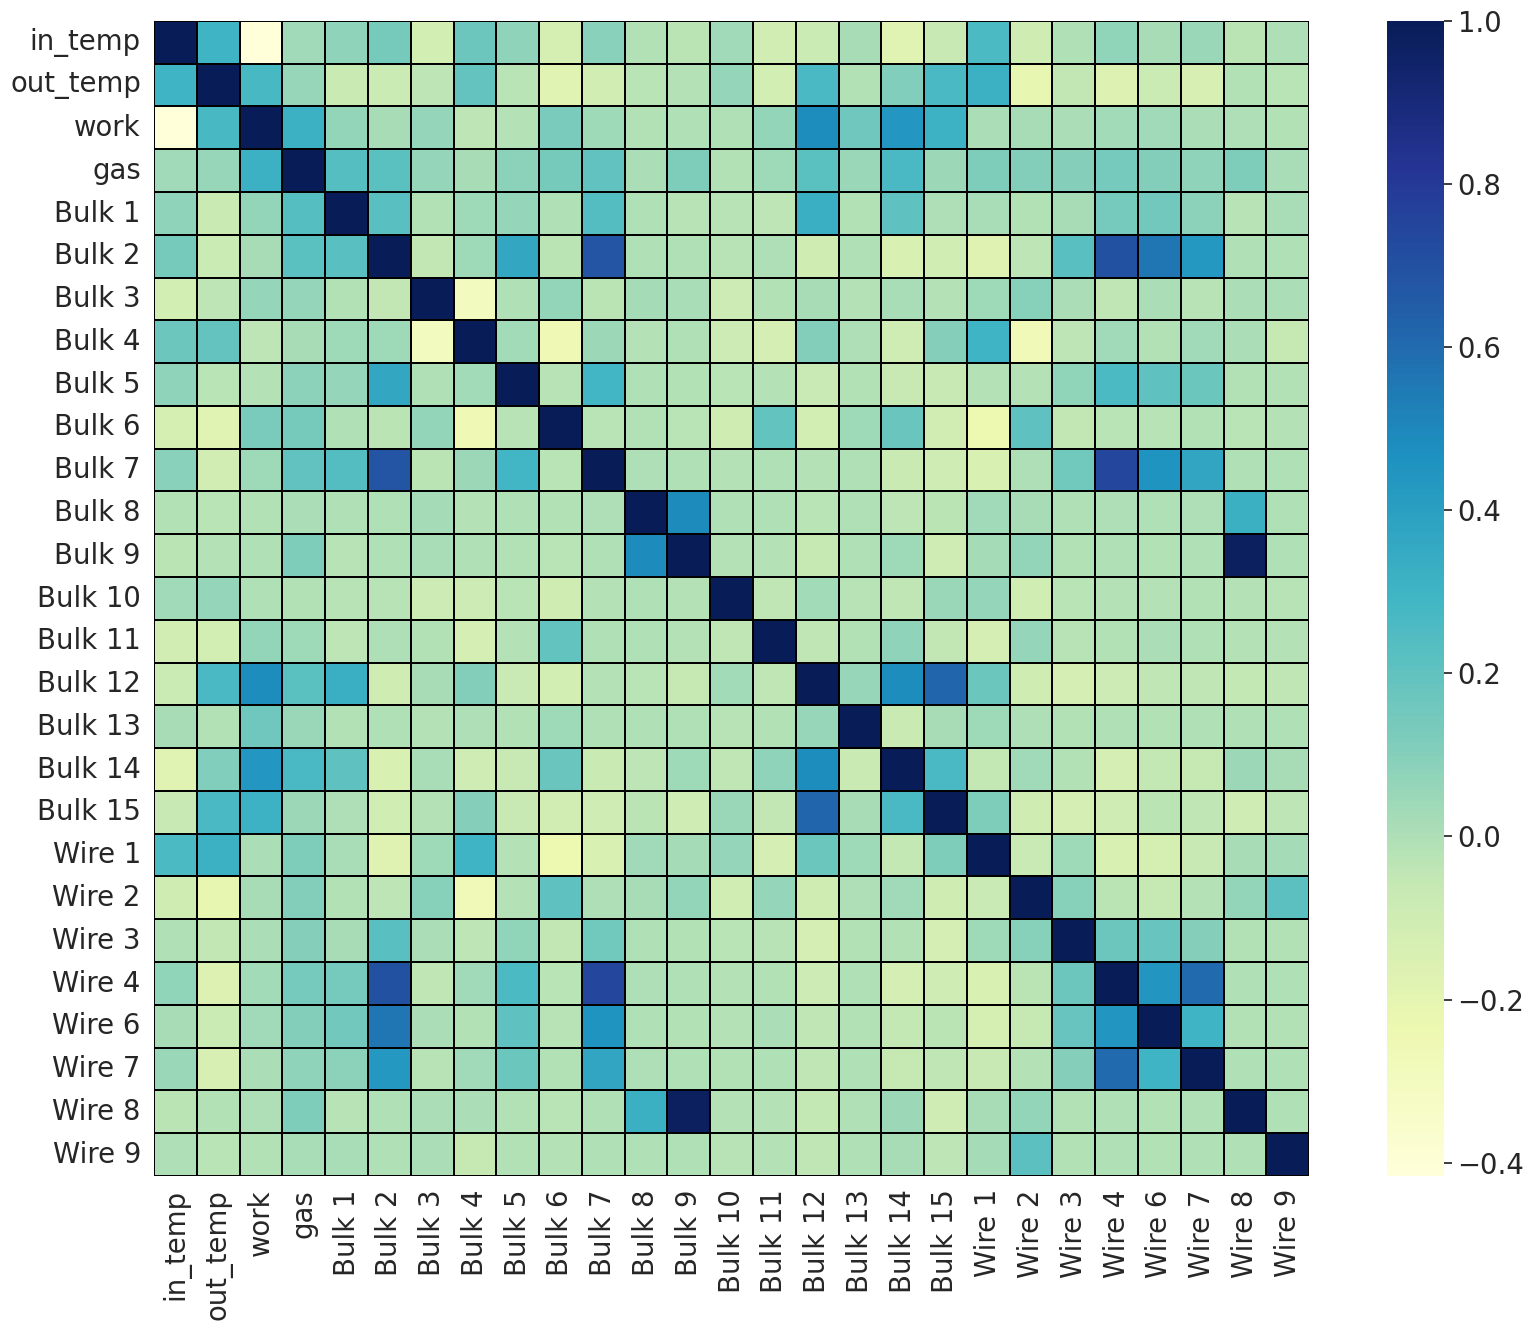

In [ ]:
# Проверка данных на мультиколлениарность

plt.figure(figsize=(20,15))
sns.set(font_scale=1.8)
sns.heatmap(data.corr(), cmap="YlGnBu", linewidth=0.1, linecolor='black', square=True)
plt.show()

***Заметки:***
- На конечную температуру "out_temp" сильно влияют начальная температура "in_temp" и работа дуги "work", эти фичи предполагались значимыми;
- Также наблюдается сильная связь между конечной температурой "out_temp" и "Bulk 12", "Bulk 15", "Wire 1";
- Есть очень сильная корреляция между "Bulk 9" и "Wire 8", возможно эти добавки всегда вносятся вместе.



____

### VIF-анализ

In [ ]:
# Проверим признаки с помощью VIF-анализа (коеф. больше 5 - насторожиться)

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(data)
ds = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
               index=X.columns)

print(ds)

const       28109.276119
in_temp         1.899818
out_temp        1.787340
work            2.502740
gas             1.410047
Bulk 1          1.412237
Bulk 2          2.924535
Bulk 3          1.164470
Bulk 4          1.423722
Bulk 5          1.165338
Bulk 6          1.309865
Bulk 7          2.697750
Bulk 8          3.734282
Bulk 9         67.708887
Bulk 10         1.072103
Bulk 11         1.071127
Bulk 12         2.747340
Bulk 13         1.096940
Bulk 14         1.701652
Bulk 15         1.793369
Wire 1          1.449457
Wire 2          1.247764
Wire 3          1.128240
Wire 4          3.506957
Wire 6          1.517033
Wire 7          1.630492
Wire 8         57.128748
Wire 9          1.061300
dtype: float64


*Заметка:* <br>
VIF-анализ подтверждает сильную корреляция между "Bulk 9" и "Wire 8", таких событий немного, удалим признак "Wire 8".

In [ ]:
# Удалим столбец wire_8

data.drop('Wire 8', axis=1, inplace=True)
data.shape

(2329, 26)

____

### F-regression

In [ ]:
# Отделим целевой признак

target = data['out_temp']
features = data.drop('out_temp', axis=1)

In [ ]:
# Используем F-тест c функцией оценки f_regression.

selector_kbest = SelectKBest(score_func=f_regression, k=10)
X_selector = selector_kbest.fit_transform(features, target)

kbest = selector_kbest.get_support()
kworst = [False if i==True else True for i in kbest]

print("Значимые признаки:", data.drop('out_temp', axis=1).columns[kbest].tolist())
print("Малозначимые признаки:", data.drop('out_temp', axis=1).columns[kworst].tolist())

Значимые признаки: ['in_temp', 'work', 'Bulk 4', 'Bulk 6', 'Bulk 12', 'Bulk 15', 'Wire 1', 'Wire 2', 'Wire 4', 'Wire 7']
Малозначимые признаки: ['gas', 'Bulk 1', 'Bulk 2', 'Bulk 3', 'Bulk 5', 'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 10', 'Bulk 11', 'Bulk 13', 'Bulk 14', 'Wire 3', 'Wire 6', 'Wire 9']


*Заметки:* <br>
Вроде логично проводить статистический анализ на полном датасете, но в некоторых источниках используют только тренировочный датасет, результат от этого не меняется.

<Axes: title={'center': 'F-тест'}, xlabel='Score', ylabel='Feature'>

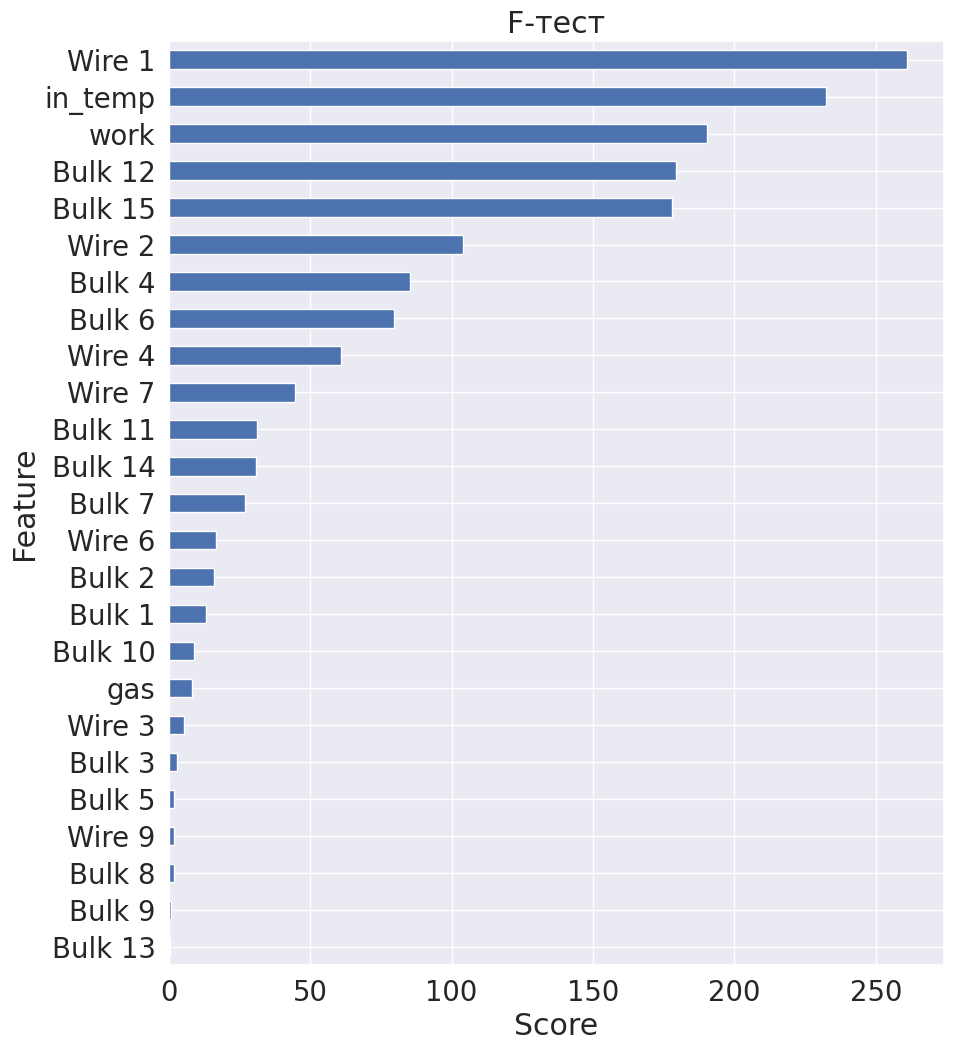

In [ ]:
# Упорядочим и визуализируем признаки по значимости

scores_kbest = pd.Series(selector_kbest.scores_,
                         name='score',
                         index=features.columns).sort_values(ascending=True).round(2)

scores_kbest.plot(kind='barh', figsize=(10,12), xlabel='Score', ylabel='Feature', title="F-тест")

*Заметки:*
- F-тест подтверждает топ-5 признаков по значимости: "in_temp", "work", "Bulk 12", "Bulk 15", "Wire 1";
- Первое место по значимости занимает "Wire 1".

____

### Выводы

**Выводы:**
- Итоговый датафрейм собран из таблиц data_temp, data_arc, data_gas, data_bulk, data_wire  и имеет размер: 26 признаков и 2329 строк (было 15907);
- Удалили столбец Wire 5, так как в отоговой таблице в него не попало ни одного значения;
- По результам проверки на мультиколлиниарность удалили признак Wire 8, так как он сильно коллерирует с "Bulk 9" (предположительно эти добавки вносят вместе);
- Анализ важности признаков с помощью F-тест подтверждает, что наиболее важные признаки: in_temp, work и добавки вносимые в больших объёмах (Bulk 12, Bulk 14, Wire 1);
- Датафреймы data_bulk_time и data_wire_time не несут важной информации и не используются.

____

## Разделение данных на выборки

In [ ]:
# Разделим данные на тренировочную и тестовую выборки.

features_train, features_test, target_train, target_test = \
    train_test_split(features, target, test_size=.25, random_state=100423)

print(f'Размер тренировочной выборки: {features_train.shape}'
      f'Размер тестовой выборки: {features_test.shape}')

# Для случая обучения модели без кросс-валидации выделим валидационную выборку.

X_train, X_valid, y_train, y_valid = \
    train_test_split(features_train, target_train, test_size=.2, random_state=100423)

Размер тренировочной выборки: (1746, 25)Размер тестовой выборки: (583, 25)


---

## Масштабирование данных

In [ ]:
scaler = StandardScaler()
features_sc = scaler.fit_transform(features_train)

pd.DataFrame(features_sc, columns=features.columns).head(3)

,in_temp,work,gas,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,...,Bulk 13,Bulk 14,Bulk 15,Wire 1,Wire 2,Wire 3,Wire 4,Wire 6,Wire 7,Wire 9
0,0.269919,-0.590380,-1.194114,-0.278041,-0.079214,1.035009,-0.648978,-0.127767,-0.39203,-0.062807,...,-0.076453,-0.100117,-0.163559,-1.844394,-0.076405,-0.119524,-0.060145,-0.117898,-0.02944,-0.081041
1,-0.325129,0.852315,0.462706,-0.278041,-0.079214,-0.616855,1.885158,-0.127767,-0.39203,-0.062807,...,-0.076453,-0.682313,-1.405490,-0.064713,-0.525473,-0.119524,-0.060145,-0.117898,-0.02944,-0.081041
2,-0.877674,-0.206954,-0.501871,-0.278041,-0.079214,-0.075260,-0.648978,-0.127767,-0.39203,-0.062807,...,-0.076453,-0.294182,1.265834,-0.552392,-0.525473,-0.119524,-0.060145,-0.117898,-0.02944,-0.081041


---

# Построение моделей


## Линейная регрессия

In [ ]:
# Обучим модель линейной ригрессии используя кросс-валлидацию

start_time = time.time()

regr_LR = LinearRegression().fit(features_sc,
                                 target_train)

scores_LR = cross_val_score(regr_LR,
                            features_sc,
                            target_train,
                            cv=5,
                            scoring='neg_mean_absolute_error')

elapsed_fit_time_LR = time.time() - start_time

print(f'MAE: {scores_LR}')
print(f'Затраченное время: {round(elapsed_fit_time_LR, 2)} s')

MAE: [-5.97413275 -7.26614555 -6.30790308 -6.5787916  -6.52734773]
Затраченное время: 0.78 s


*Заметки:*
- Для расчёта времени работы кода можно испльзовать магическую команду "%%time";
- Оценка времени обучения можно сравнивать на моделях с уже подобранными гиперпараметрами без использования cross_val_score или GridSearchCV;
- Также может быть полезно сравнить модели по времени предсказания.

In [ ]:
# Параметры модели

# print('model parameters:')
# print('- intercept (b0) = {}'.format(regr_LR.intercept_))
# print('- slope (b1) = {}'.format(regr_LR.coef_))

In [ ]:
# Создадим датафрейм для результатов

df_results = pd.DataFrame(columns=['model', 'mae'])

# Добавим строку к фрейму с результатами

row_LR = {'model': 'LinearRegression',
          'mae': abs(round(scores_LR.mean(), 2))}
df_results.loc[len(df_results.index)] = row_LR
df_results

,model,mae
0,LinearRegression,6.53


---

### Упаковка в пайплайн

*Заметки:*
- Не все модели требуют масштабирования данных, поэтому можно не масштабировать отдельно, а упаковать в pipeline;
- Добавим отбор по значимости признаков.

In [ ]:
# Собирём пайплайн

steps_LR = [('scaler', StandardScaler()),
            ('select', SelectKBest(score_func=f_regression, k=5)), # k - число значимых признаков
            ('clf', LinearRegression())]

pipe_LR_kbest = Pipeline(steps_LR)

LR_kbest = pipe_LR_kbest.fit(features_sc, target_train)

pipe_LR_kbest

Pipeline(steps=[('scaler', StandardScaler()),
                ('select',
                 SelectKBest(k=5,
                             score_func=<function f_regression at 0x7dd7de31c4c0>)),
                ('clf', LinearRegression())])

In [ ]:
# Топ-5 значимых признаков

kbest = pipe_LR_kbest.named_steps['select'].get_support()

print("Топ-5 значимых признаков:", features.columns[kbest].tolist())

Топ-5 значимых признаков: ['in_temp', 'work', 'Bulk 12', 'Bulk 15', 'Wire 1']


#### GridSearchCV

In [ ]:
# Перебирём число значимых признаков

param_grid = {'select__k': [5, 10, 15, 20, 25]}

pipe_LR_GS = GridSearchCV(pipe_LR_kbest,
                          param_grid=param_grid,
                          scoring='neg_mean_absolute_error',
                          cv=5, verbose=0)
pipe_LR_GS.fit(features_sc, target_train)

print(f'Лучшие параметры: {pipe_LR_GS.best_params_}')
print(f' MAE: {round(pipe_LR_GS.best_score_, 2)}')

Лучшие параметры: {'select__k': 25}
 MAE: -6.53


*Заметки:* <br>
Лучшее значение MAE достигается при 25 признаках, то есть важны все признаки.

____

### Анализ значимости признаков

*Литература по теме:*<br>
1. https://inria.github.io/scikit-learn-mooc/python_scripts/dev_features_importance.html - Feature importance;
2. https://habr.com/ru/articles/550978 - Отбор признаков в задачах машинного обучения.

#### Ridge regression

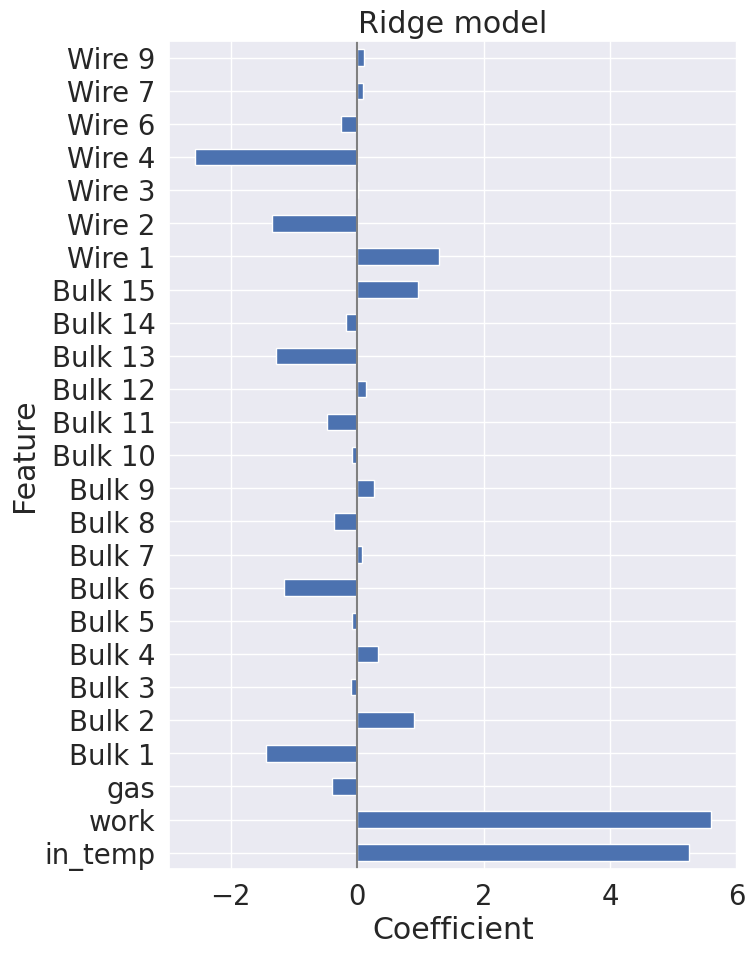

In [ ]:
# Посмотрим на коэффициенты ridge ригрессии при разных фичах.

ridge = RidgeCV()
ridge.fit(features_sc, target_train)

coefs = pd.DataFrame(ridge.coef_,
                     columns=["Coefficients"],
                     index=features.columns)
coefs.plot(kind="barh", figsize=(8, 10), title="Ridge model",
           xlabel="Coefficient", ylabel="Feature", legend=None)
plt.axvline(x=0, color='.5')
plt.tight_layout()


*Заметки:*
- Наибольшие веса стоят перед фичами "in_temp" и "work" и положительны, так как они участвуют в подогреве сплава;
- Продувка газом понижает температуру, что тоже логично.
- Добавление сыпучих добавок и проволки поидее должны понижать температуру сплава, но здесь не всё однозначно;
- Самый маленький вклад даёт "Wire 3".

---

#### *Permutation feature importance*

In [ ]:
# Проверим значимость признаков с помощью метода Permutation feature importance
# на моделе линейной регрессии

per_LR = permutation_importance(regr_LR,
                                features_sc, target_train,
                                n_repeats=30, random_state=12345)

for i in per_LR.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}'
          f' {per_LR.importances_mean[i]:.3f} '
          f'+/- {per_LR.importances_std[i]:.3f}')

work 0.526 +/- 0.018
in_temp 0.456 +/- 0.018
Wire 4 0.121 +/- 0.010
Bulk 1 0.034 +/- 0.005
Wire 2 0.029 +/- 0.004
Wire 1 0.027 +/- 0.003
Bulk 13 0.026 +/- 0.005
Bulk 6 0.022 +/- 0.003
Bulk 15 0.016 +/- 0.003
Bulk 2 0.014 +/- 0.004
Bulk 11 0.004 +/- 0.002
gas 0.003 +/- 0.001
Bulk 8 0.003 +/- 0.002
Bulk 4 0.002 +/- 0.001
Bulk 9 0.001 +/- 0.001
Wire 6 0.001 +/- 0.001
Wire 7 0.001 +/- 0.001
Bulk 14 0.001 +/- 0.001
Wire 9 0.000 +/- 0.000
Bulk 10 0.000 +/- 0.000
Bulk 7 0.000 +/- 0.000
Bulk 12 0.000 +/- 0.000
Bulk 5 0.000 +/- 0.000
Bulk 3 0.000 +/- 0.000
Wire 3 -0.000 +/- 0.000


*Заметки:*
- Как и в ridge regression фича "Wire 3" вносит самая малый вклад.

____

#### Сравнение с шумовым признаком

*Заметки:*
- Мы остановимся на добалении одного шумового признака с нормальным распределением, но вообщем не будет лишним добавить несколько шумовых признаков;
- Шумовые признаки могут иметь не только нормальное распределение, но и,например, непрерывное равномерное распределение или распределение Лапласа.

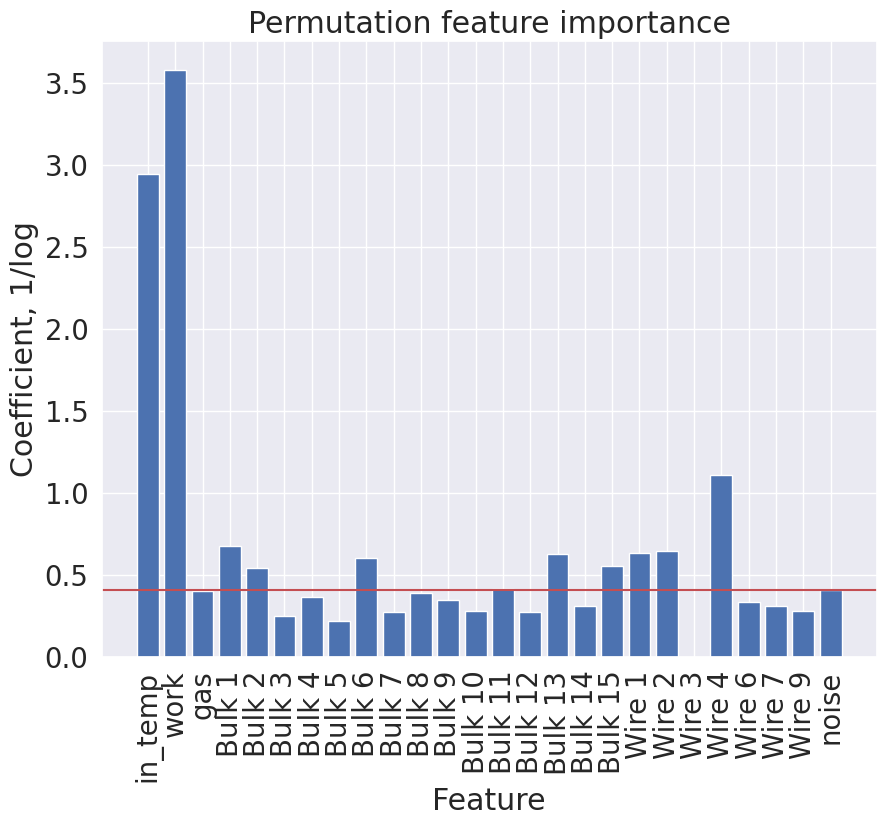

In [ ]:
# Проверим признаки на "адекватность":
# добавим столбец с 'шумом', нормально распределённым около 0.

features_noise = pd.DataFrame(features_sc.copy(), columns=features_train.columns)
features_noise['noise'] =  np.random.randn(len(features_train))

# Обучим модель на признаках со столбцом шума
regr_LR_noise = LinearRegression().fit(features_noise,
                                       target_train)

per_LR_noise = permutation_importance(regr_LR_noise,
                                      features_noise, target_train,
                                      n_repeats=30, random_state=12345)

# Построим барплот в логарифмической шкале, чтобы растянуть маловажные признаки (чем выше, тем маловажнее)

plt.figure(figsize=(10, 8))
importance_log = -1/np.log10(per_LR_noise.importances_mean)
plt.bar(x=features_noise.columns, height=importance_log)
plt.title("Permutation feature importance")
plt.xlabel("Feature")
plt.ylabel("Coefficient, 1/log")
plt.xticks(rotation=90)
plt.axhline(y=importance_log[-1], color='r')
plt.grid(True)
plt.show()

*Заметки:*
- Из диаграммы видно, что значимость 10-ти признаков лежит заметно выше порога "шума", остальные - около порога, признак "Wire 3" вообще выпадает (около нуля).

____

## K-ближайших соседей

***Заметки:***
Для метода k-ближайших соседей масштабирование признаков имеет важное значение.

In [ ]:
# Обучим модель k-ближайших соседей и переберём параметр 'число ближайших соседей'.

%%time

rs_KNR = GridSearchCV(KNeighborsRegressor(),
                      {'n_neighbors': range(3, 16, 3)},
                       scoring='neg_mean_absolute_error',
                       cv=5, verbose=0)
rs_KNR.fit(features_sc, target_train)  # Обучаем на масштабированных данных

print(f'Лучшие параметры: {rs_KNR.best_params_}')
print(f' MAE: {round(rs_KNR.best_score_, 2)}')

Лучшие параметры: {'n_neighbors': 12}
 MAE: -6.71
CPU times: user 291 ms, sys: 19.9 ms, total: 311 ms
Wall time: 391 ms


In [ ]:
# Добавим результат к итоговому фрейму

row_KNR = {'model': 'KNeighborsRegressor',
           'mae': abs(round(rs_KNR.best_score_, 2))}
df_results.loc[len(df_results.index)] = row_KNR
df_results

,model,mae
0,LinearRegression,6.53
1,KNeighborsRegressor,6.71


---

## Случайный лес

In [ ]:
# Обучим модель слечайного леса и перебирём параметры: максимальная глубина дерева и число деревьев.

%%time

grid_RFR = RandomizedSearchCV(RandomForestRegressor(),
                              {'max_depth': range(6, 12, 2),
                               'n_estimators': [100,200,400,800]},
                               scoring='neg_mean_absolute_error',
                               n_iter=10, cv=5, verbose=0,
                               random_state=123)
grid_RFR.fit(features_sc, target_train)

print(f'Лучшие параметры: {grid_RFR.best_params_}')
print(f' MAE: {round(grid_RFR.best_score_, 2)}')

Лучшие параметры: {'n_estimators': 200, 'max_depth': 8}
 MAE: -6.11
CPU times: user 2min 21s, sys: 338 ms, total: 2min 22s
Wall time: 2min 39s


In [ ]:
# Добавим результат к итоговому фрейму

row_RFR = {'model': 'RandomForestRegressor',
           'mae': abs(round(grid_RFR.best_score_, 2))}
df_results.loc[len(df_results.index)] = row_RFR
df_results

,model,mae
0,LinearRegression,6.53
1,KNeighborsRegressor,6.71
2,RandomForestRegressor,6.11


---

### Упакрвка в пайплаин нескольких моделей

Это дополнительный подраздел - моя попытка упаковать в пайплайн сразу несколько моделей и перебрать в гридсёч по методам предобработки, моделям и гиперпараметрам.

Код рабочий, лучшая модель и MAE согласуется с результатами выше, но есть сомнения в корректности того, что за чем считается.

In [ ]:
# Собирём пайплайн, который будем передавать в GridSearchCV.

steps_RFR = [('select', SelectKBest(score_func=f_regression)),
            ('clf', RandomForestRegressor())]

pipe_RFR = Pipeline(steps_RFR)
pipe_RFR

Pipeline(steps=[('select',
                 SelectKBest(score_func=<function f_regression at 0x7dd7de31c4c0>)),
                ('clf', RandomForestRegressor())])

In [ ]:
# Создадим список словарей с моделями и гиперпараметрами для GridSearchCV
param_2clf = [{'select': [SelectKBest(score_func=f_regression)],
               'select__k': range(11, 27, 5),
               'clf': [LinearRegression()]},
              {'select': ['passthrough', SelectKBest(k=10, score_func=f_regression)],
               'clf': [RandomForestRegressor()],
               'clf__max_depth': range(8, 12, 2),
               'clf__n_estimators': [200, 400, 800]}
              ]

GS_2clf = GridSearchCV(pipe_RFR,  # Можно задать pipe_LR_kbest из модуля линейная регрессия.
                       param_grid=param_2clf,  # Независимо от заданной выше модели, вычисления будут согласно последовательности в списке param_2clf.
                       scoring='neg_mean_absolute_error',
                       cv=5, verbose=0)
GS_2clf.fit(features_sc, target_train)

print(f'Лучшие параметры: {GS_2clf.best_params_}')
print(f' MAE: {round(GS_2clf.best_score_, 3)}')


Лучшие параметры: {'clf': RandomForestRegressor(), 'clf__max_depth': 10, 'clf__n_estimators': 400, 'select': 'passthrough'}
 MAE: -6.103


*Заметки:*
- Лучшие результаты даёт модель случайного леса с глубиной дерева 10, что согласуется с результатами выше;
- Число деревьев варьируется при каждом запуске, но метрика мало меняется, можно считать 400 деревьев достаточным.

____

### Анализ значимости признаков

#### Feature_importances

In [ ]:
# Обучим модель случайного леса с лучшими гиперпараметрами

regr_RF = RandomForestRegressor(max_depth=10, n_estimators=800).\
                                            fit(features_sc,target_train)

In [ ]:
# Метод feature_importances_

for name, importance in sorted(zip(features_train.columns,
                                   regr_RF.feature_importances_),
                               key=lambda x: -x[1]):
    print(f'{name} : {round(importance, 2)}')

in_temp : 0.23
work : 0.23
Wire 1 : 0.11
Bulk 6 : 0.06
gas : 0.06
Bulk 15 : 0.05
Wire 2 : 0.05
Bulk 14 : 0.04
Bulk 12 : 0.04
Bulk 3 : 0.02
Bulk 7 : 0.02
Bulk 4 : 0.02
Wire 4 : 0.02
Wire 6 : 0.02
Bulk 1 : 0.01
Bulk 11 : 0.01
Wire 7 : 0.01
Wire 3 : 0.01
Bulk 10 : 0.01
Bulk 5 : 0.0
Bulk 2 : 0.0
Bulk 13 : 0.0
Wire 9 : 0.0
Bulk 9 : 0.0
Bulk 8 : 0.0


____

#### *Permutation feature importance*

In [ ]:
# Проверим значимость признаков с помощью метода Permutation feature importance

per_RF = permutation_importance(regr_RF,
                                features_sc, target_train,
                                n_repeats=30, random_state=12345)

for i in per_RF.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}'
          f' {per_RF.importances_mean[i]:.3f}'
          f'+/- {per_RF.importances_std[i]:.3f}')

work 0.661+/- 0.019
in_temp 0.626+/- 0.020
Wire 1 0.151+/- 0.004
Bulk 6 0.089+/- 0.004
Bulk 15 0.072+/- 0.004
Wire 2 0.060+/- 0.002
gas 0.057+/- 0.002
Bulk 12 0.039+/- 0.001
Bulk 14 0.039+/- 0.001
Bulk 3 0.018+/- 0.001
Bulk 4 0.018+/- 0.001
Wire 4 0.014+/- 0.001
Bulk 7 0.014+/- 0.001
Bulk 1 0.011+/- 0.001
Wire 6 0.008+/- 0.001
Bulk 11 0.005+/- 0.000
Wire 7 0.004+/- 0.000
Bulk 10 0.003+/- 0.000
Wire 3 0.003+/- 0.000
Bulk 5 0.002+/- 0.000
Bulk 2 0.000+/- 0.000
Bulk 13 0.000+/- 0.000
Wire 9 0.000+/- 0.000
Bulk 9 0.000+/- 0.000
Bulk 8 0.000+/- 0.000


#### Сравнение с шумовым признаком

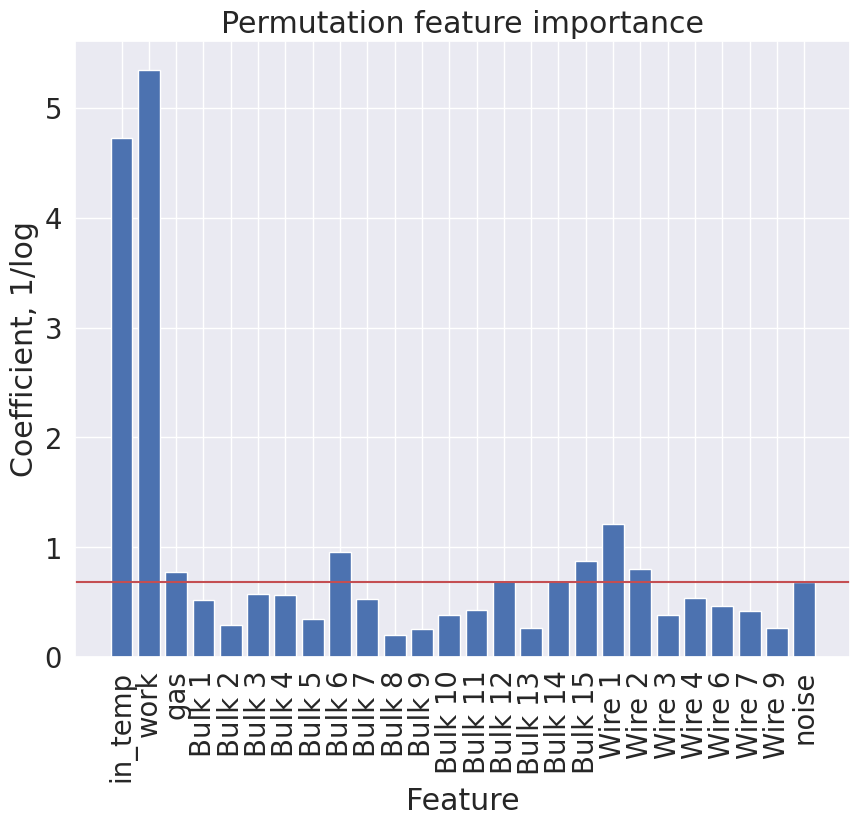

In [ ]:
# Проверим признаки на "адекватность":
# добавим столбец с 'шумом', нормально распределённым около 0.

# Обучим модель на признаках со столбцом шума
regr_RF_noise = RandomForestRegressor(max_depth=10, n_estimators=400).\
                                            fit(features_noise,target_train)

per_RF_noise = permutation_importance(regr_RF_noise,
                                      features_noise, target_train,
                                      n_repeats=30, random_state=12345)

# Построим барплот в логарифмической шкале, чтобы растянуть маловажные признаки (чем выше, тем маловажнее)

plt.figure(figsize=(10, 8))
importance_log = -1/np.log10(per_RF_noise.importances_mean)
plt.bar(x=features_noise.columns, height=importance_log)
plt.title("Permutation feature importance")
plt.xlabel("Feature")
plt.ylabel("Coefficient, 1/log")
plt.xticks(rotation=90)
plt.axhline(y=importance_log[-1], color='r')
plt.grid(True)
plt.show()

*Заметки:*
- Permutation importance для случайного леса и линейной ригресии единогласно выделяют 2 самых важных признака "work" и "in_temp", в остальном резултаты заметно отличаются;
- Всего 9 признаков по важности выше или сравнимы с порогом "шума", а остальные - заметно ниже.

---

## Градиентный бустинг

### LightGBM

#### Метод fit

In [ ]:
# Обучим модель LGBMRegressor используя метод fit() c гиперпараметрами по умолчанию.

boost_LGB = lgb.LGBMRegressor(learning_rate=0.1,  # По умолчанию
                              num_leaves=31,  # По умолчанию
                              n_estimators=100,  # По умолчанию
                              num_iterations=100,  # По умолчанию
                              random_state=12345,
                              verbose=-1)
eval_result = {}
regr_LGB = boost_LGB.fit(X_train, y_train,
                         eval_set=[(X_train, y_train),
                                   (X_valid, y_valid),
                                  #  (features_test, target_test)  # Можно добавить больше двух выборок
                                   ],
                         eval_names=["train", "valid"], # Имена наборов в eval_set
                         eval_metric=["mae", "rmse"],
                         callbacks=[lgb.record_evaluation(eval_result)]
                         )

# Проверка на валидационной выборке

pred_lgb = boost_LGB.predict(X_valid)
mae_lgb = mean_absolute_error(y_valid, pred_lgb)
print(f'MAE на валидационной выборке: {mae_lgb:.2f}')

MAE на валидационной выборке: 6.18


*Заметки:*
- Для записи результатов оценки (параметры eval) на каждой итерации нужно вызвать метод lgb.record_evaluation(eval_result), который записывает историю итераций в словарь eval_result. До обращения к record_evaluation нужно инициализировать пустой словарь eval_result = {};
- По умолчанию LGBMRegressor для оценки качества оценки на каждой итерации использует метрику L2, можно задать дополнительные метрики eval_metric=["mae", "rmse"];
- Результаты для MAE записываются как "L1" и чтобы построить метрику методом lgb.plot_metric() нужно задать metric="l1";
- Имена заданные в eval_names определяют имена на легенде lgb.plot_metric().

<Axes: title={'center': 'Metric during iterations'}, xlabel='Iterations', ylabel='MAE'>

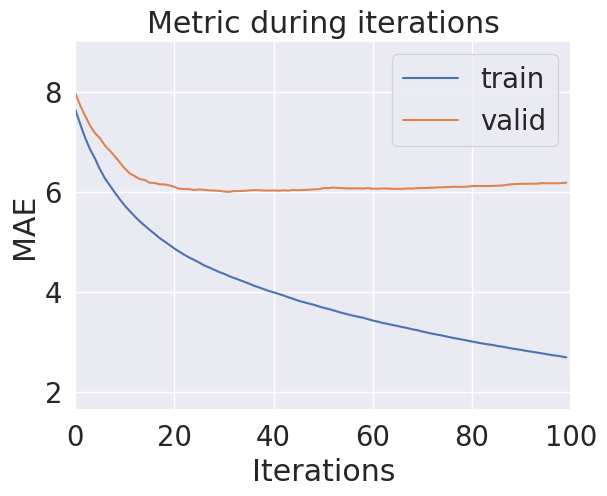

In [ ]:
# Посмотрим сходимость MAE.

lgb.plot_metric(boost_LGB, metric="l1",
                title="Metric during iterations",
                ylabel='MAE'  # По умолчанию '@metric@'
                )

*Заметки:*
- Примерно после 30 итераций качество модели на валидационной выборке падает.

<Axes: title={'center': 'Feature importance'}, xlabel='Importance', ylabel='Features'>

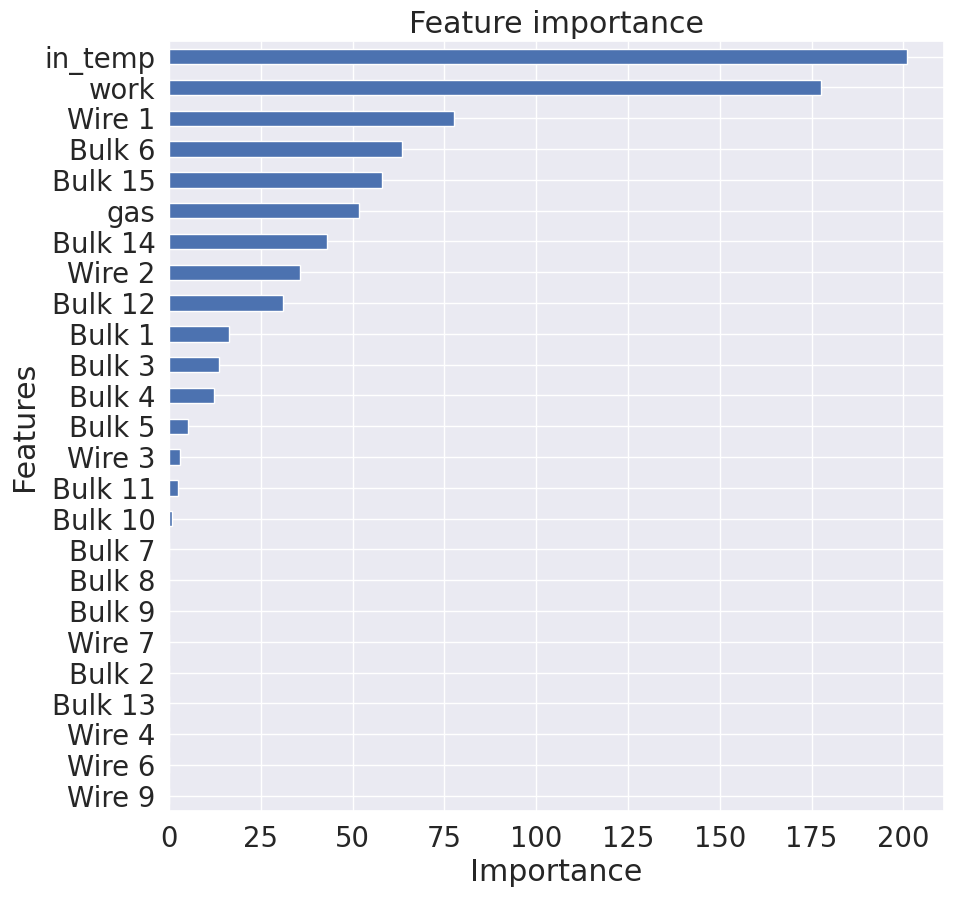

In [ ]:
# Анализ значимости признаков

importance_LGB = regr_LGB.booster_.feature_importance(importance_type='gain')
importance_LGB_result = pd.DataFrame({'feature': features.columns,
                                      'importance': importance_LGB/1000}).\
                                                  sort_values(by='importance')
importance_LGB_result.plot.barh(x='feature', y='importance',
                                figsize=(10,10),
                                title='Feature importance',
                                legend=False,
                                xlabel='Importance',
                                ylabel='Features')

____

#### Метод train

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[32]	train's rmse: 5.92467	train's l2: 35.1018	train's l1: 4.31391	valid's rmse: 8.21224	valid's l2: 67.4409	valid's l1: 5.99817
MAE: 6.00
Число итераций: 32 
Значения метрик последней итерации: ('valid', OrderedDict([('rmse', 8.212242323397952), ('l2', 67.44092397820859), ('l1', 5.998170677981956)]))


<Axes: title={'center': 'Metric during iterations'}, xlabel='Iterations', ylabel='MAE'>

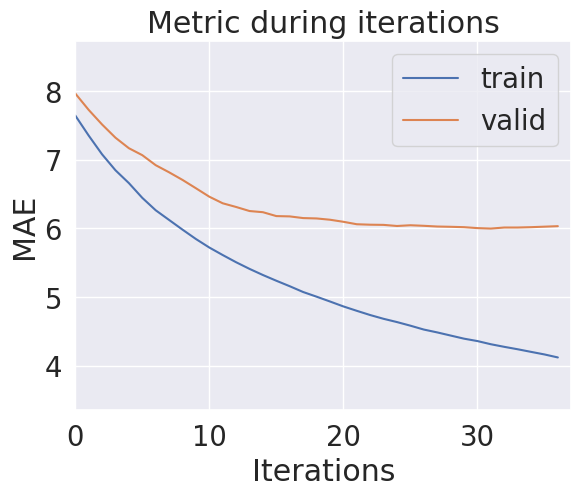

In [ ]:
# Обучим модель LGBMRegressor используя метод train c гиперпараметрами по умолчанию.

# Собирём тренировочный и тестовый датасет для модели LightGBM

lgb_train = lgb.Dataset(X_train, y_train,
                        feature_name=features.columns.tolist())
lgb_valid = lgb.Dataset(X_valid, y_valid,
                       feature_name=features.columns.tolist(),
                       reference=lgb_train)

# Обучим модель с гиперпараметрами по умолчанию

params_lgb_train = {"boosting_type": "gbdt",
                    "objective": "regression",
                    "metric": {"mae", "l2", "rmse"},
                    "learning_rate": 0.1, # По умолчанию
                    "num_leaves": 31, # По умолчанию
                    "n_estimators": 100, # По умолчанию
                    "verbose": 0,
                    "random_state": 12345}
evals = {}
booster_LGB_train = lgb.train(params_lgb_train,
                              train_set=lgb_train,
                              valid_sets=[lgb_valid, lgb_train],
                              valid_names=["valid", "train"],
                              num_boost_round=100,  # По умолчанию
                              callbacks=[lgb.record_evaluation(evals),
                                         lgb.early_stopping(stopping_rounds=5)]
                              )

# Расчёт MAE на валидационной выборке.

pred_lgb_train = booster_LGB_train.predict(X_valid)
mae_lgb_train = mean_absolute_error(y_valid, pred_lgb_train)
print(f'MAE: {mae_lgb_train:.2f}')

# Посмотрим результаты ранней остановки.
print(f'Число итераций: {booster_LGB_train.best_iteration} \n'
      f'Значения метрик последней итерации: {list(booster_LGB_train.best_score.items())[1]}')

# Посмотрим сходимость MAE.
lgb.plot_metric(evals, metric ="l1",
                title="Metric during iterations",
                ylabel='MAE'  # По умолчанию '@metric@'
                )

*Заметки:*
- Метод early_stopping останавливает обучение, если указанная метрика не улучшается за заданное количество эпох stopping_rounds;
- Число итераций до остановки и значение метрик можно узнать с помощью атрибутов best_iteration и best_score;
- Ранняя остановка улучшает метрику и котролирует переобучение.

____

#### RandomizedSearchCV

In [ ]:
# Подбирём гиперпараметры модели LGBMRegressor с помощью RandomizedSearchCV.

booster_LGB = lgb.LGBMRegressor(random_state=12345, verbose=-1,
                                callbacks=[lgb.early_stopping(stopping_rounds=5)])

parameters = {'metrics': ['mae'],
              'n_estimators': [50, 100, 200, 400, 800],
              'learning_rate': np.arange(0.04, 0.14, 0.02),
              'num_leaves': np.arange(5, 40, 5),
              }

RS_LGB = RandomizedSearchCV(booster_LGB, parameters,
                            scoring='neg_mean_absolute_error',
                            n_iter=20, cv=3, verbose=0,
                            random_state=12345)

RS_LGB.fit(features_train, target_train)

print(f'Лучшие параметры: {RS_LGB.best_params_}')
print(f' MAE: {abs(round(RS_LGB.best_score_, 2))}')

Лучшие параметры: {'num_leaves': 5, 'n_estimators': 100, 'metrics': 'mae', 'learning_rate': 0.09999999999999999}
 MAE: 6.1


In [ ]:
# Добавим строку к фрейму с результатами

row_LGB = {'model': 'LGBMRegressor',
           'mae': abs(round(RS_LGB.best_score_, 2))}
df_results.loc[len(df_results.index)] = row_LGB
df_results

,model,mae
0,LinearRegression,6.53
1,KNeighborsRegressor,6.71
2,RandomForestRegressor,6.11
3,LGBMRegressor,6.10


---

### CatBoost

*Литература по теме:*
1. https://colab.research.google.com/github/catboost/tutorials/blob/master/python_tutorial.ipynb - CatBoost Tutorial;
4. https://catboost.ai/en/docs/concepts/python-reference_catboostregressor - официальное руководство;
2. https://habr.com/ru/companies/otus/articles/778714/ - обзор с примерами;
3. https://habr.com/ru/articles/599827/ - - обзор с примерами.

In [ ]:
# Обучим модель CatBoostRegressor.

booster_CAT = CatBoostRegressor(loss_function='RMSE',  # по умолчанию 'RMSE' (для задачи классификации Logloss)
                                iterations=500,  # (n_estimators) по умолчанию 1000
                                learning_rate=0.1,  # (eta) по умолчанию 0.03
                                depth=6,  # по умолчанию 6
                                l2_leaf_reg=3,  # по умолчанию 3
                                eval_metric='MAE',  # Контролирует переобучение
                                random_seed=42,
                                logging_level='Silent',  # тоже что verbose=False
                                use_best_model=False  # Если True при перезапуске модели используется best_itaration_
                                )
booster_CAT.fit(X_train, y_train,
                eval_set=(X_valid, y_valid),
                # verbose=False,
                plot=False  # Включил widgetsnbextention, но не работает
                )

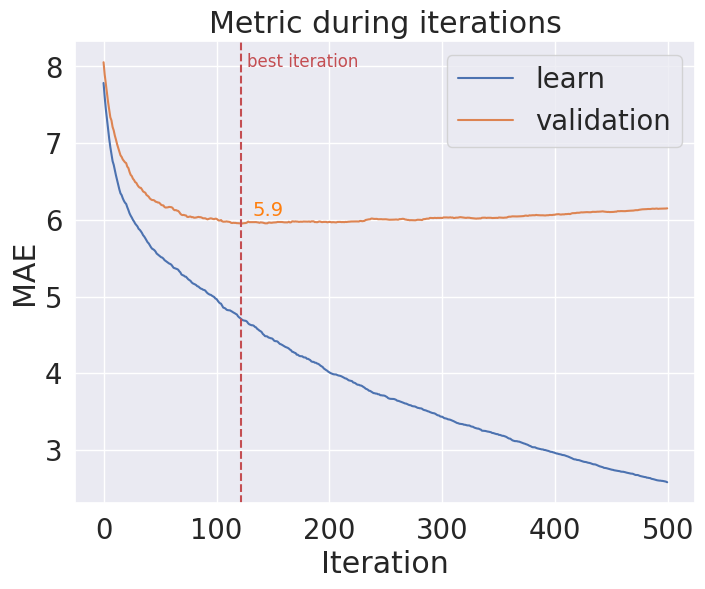

In [ ]:
# Построим зависимость метрики от номера итерации
# Автоматическое построение (plot=True) не работает, хотя загрузил все библиотеки согласно описанию catboost.

evals_result_cat = booster_CAT.get_evals_result()
best_iter_cat = booster_CAT.get_best_iteration()
best_valid_score_cat = booster_CAT.get_best_score()['validation']['MAE']

plt.figure(figsize=(8,6))
plt.plot(evals_result_cat['learn']['MAE'])
plt.plot(evals_result_cat['validation']['MAE'])
plt.legend(['learn', 'validation'])
plt.title('Metric during iterations')
plt.xlabel('Iteration')
plt.ylabel('MAE')
plt.axvline(best_iter_cat, c='r', linestyle='--')
plt.text(best_iter_cat + 5, 8, 'best iteration', fontsize=12, c='r')
plt.text(best_iter_cat + 10, best_valid_score_cat + .1, round(best_valid_score_cat, 1),
         fontsize=14, c=plt.get_cmap("tab10").colors[1])
plt.show()

In [ ]:
# Сравнение моделей с лучшей метрикой и ранней остановкой

# Модель с лучшей метрикой

best_params_cat = booster_CAT.get_params()
best_params_cat.update({'use_best_model': True})
best_booster_CAT = CatBoostRegressor(**best_params_cat)
best_booster_CAT.fit(X_train, y_train,
                     eval_set=(X_valid, y_valid))

# Модель с ранней остановкой
stop_params_cat = booster_CAT.get_params()
stop_params_cat.update({'early_stopping_rounds': 5})
stop_booster_CAT = CatBoostRegressor(**stop_params_cat)
stop_booster_CAT.fit(X_train, y_train,
                     eval_set=(X_valid, y_valid))


print('Simple model validation MAE: {:.2} (tree count = {})'.format(
       mean_absolute_error(y_valid, booster_CAT.predict(X_valid)),
       booster_CAT.tree_count_))
print('Best model validation MAE: {:.2} (tree count = {})'.format(
       mean_absolute_error(y_valid, best_booster_CAT.predict(X_valid)),
       best_booster_CAT.tree_count_))
print('Early-stopped model validation MAE: {:.2} (tree count = {})'.format(
       mean_absolute_error(y_valid, stop_booster_CAT.predict(X_valid)),
       stop_booster_CAT.tree_count_))

Simple model validation MAE: 6.2 (tree count = 500)
Best model validation MAE: 5.9 (tree count = 123)
Early-stopped model validation MAE: 6.2 (tree count = 61)


<Axes: title={'center': 'Feature importance'}, xlabel='Importance', ylabel='Features'>

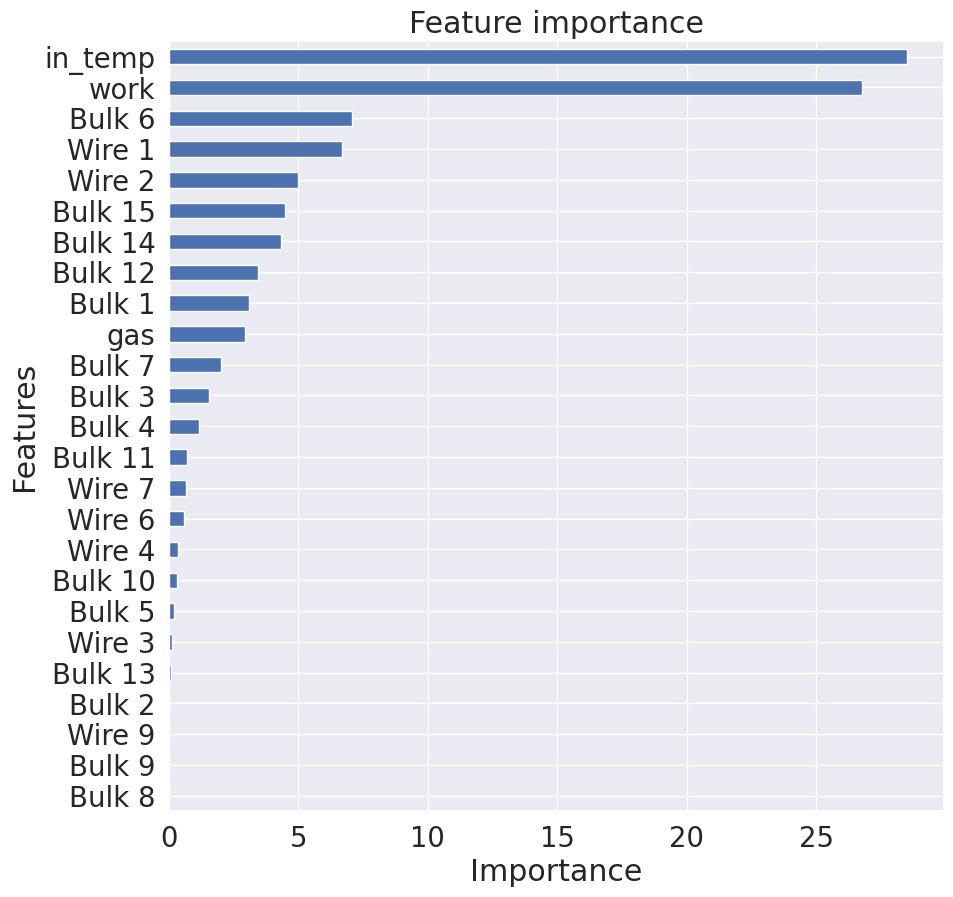

In [ ]:
# Значимость признаков

importance_cat = best_booster_CAT.feature_importances_
importance_cat_result = pd.DataFrame({'feature': features.columns,
                                      'importance': importance_cat}).\
                                                  sort_values(by='importance')
importance_cat_result.plot.barh(x='feature', y='importance',
                                figsize=(10,10),
                                title='Feature importance',
                                legend=False,
                                xlabel='Importance',
                                ylabel='Features')

*Заметки:*
- Задание валидационной выборки eval_set контролирует переобучение модели, лучшее значение метрики eval_metric записывется в best_iteration_ (tree_count_) и best_score (В нашем случае MAE=5.9 при 123 итерациях);
- Если в параметрах модели указать use_best_model=True, то в предсказании будет использоваться модель с best_iteration_, соответствующаяя best_score_ при проверке на eval_set;
- Для сокращения времени расчёта можно использовать раннюю остановку early_stopping_rounds (для неё так же необходимо задавать eval_set) и уже из этой модели брать best_iteration_;
- В Colab часто не работает автоматическое построение графиков plot=True (Обычно помогает !pip install ipywidgets и !juputer nbextension enable --py widgetsnbextention), можно построить зависимость метрики от номера итерации
вручную используя метод get_evals_result();
- Если задана валидационная выборка eval_set, то можно использовать раннюю остановку early_stopping_rounds=True;



____

#### Cross-validation

Training on fold [0/3]

bestTest = 30.21098266
bestIteration = 199

Training on fold [1/3]

bestTest = 27.68198135
bestIteration = 197

Training on fold [2/3]

bestTest = 31.56941039
bestIteration = 199

Лучшее значение MAE: 15.2


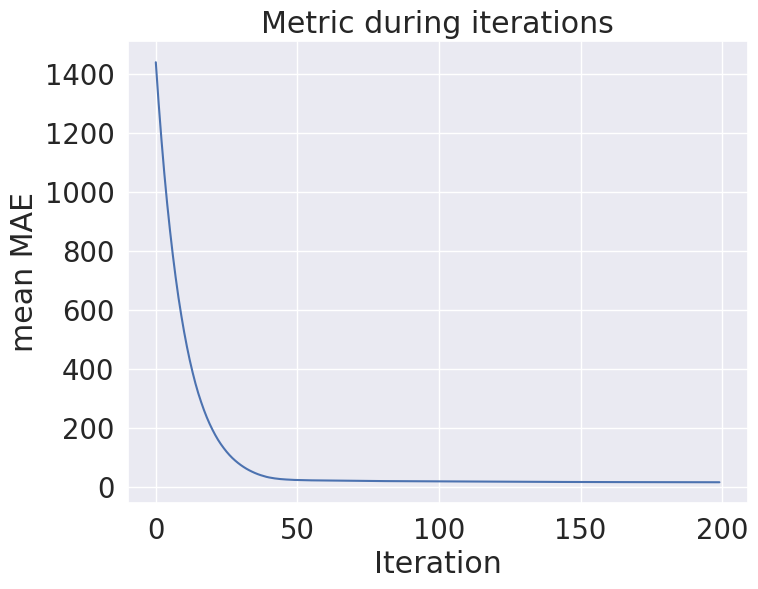

In [ ]:
# Зададим гиперпараметры модели

cv_params_cat = {"loss_function": 'RMSE',
                 "custom_metric": 'MAE',
                 "iterations": 200,
                 "learning_rate": 0.1,
                 "random_seed": 42,
                 "use_best_model": False}

# Запустим обучение с кросс-валидацией

booster_CAT_CV = cv(pool=Pool(features_train, label=target_train),
                    params=cv_params_cat,
                    fold_count=3,  # По умолчанию
                    partition_random_seed=0, # По умолчанию
                    shuffle=True, # По умолчанию
                    verbose=False)

best_MAE_cv_cat =round(booster_CAT_CV['test-MAE-mean'].min(), 2)
print(f'Лучшее значение MAE: {best_MAE_cv_cat}')

# Визуализация сходимости метрики

plt.figure(figsize=(8,6))
plt.plot(booster_CAT_CV['test-MAE-mean'])
plt.title('Metric during iterations')
plt.xlabel('Iteration')
plt.ylabel('mean MAE')
plt.show()

*Заметки:*<br>
Картина сходимости MAE очень сильно отличается от предыдущей: начинается с крайне завышенного значения и быстро сходитcя к большей величине, чем обучение с гиперпараметрами по умолчанию.
Долго ковырялся, но так и не разобрался в чём дело.

____

#### hyperopt

*Литература по теме:*
1. https://habr.com/ru/articles/542624/ - подбор гиперпараметров с помощью hyperopt.
2. https://hyperopt.github.io/hyperopt/getting-started/search_spaces/

In [ ]:
# Зададим функцию, которую будем оптимизировать.
# Она принимает на вход гиперпараметры и возвращает значение MAE на лучшей итерации.

def objective(params):
  model = CatBoostRegressor(loss_function='RMSE',
                            iterations=200,
                            l2_leaf_reg=int(params['l2_leaf_reg']),
                            learning_rate=params['learning_rate'],
                            depth=int(params['depth']),
                            eval_metric='MAE',
                            random_seed=42,
                            logging_level='Silent'
                            )
  model.fit(X_train, y_train,
            eval_set=(X_valid, y_valid),
            plot=False
            )
  best_mae = model.get_best_score()['validation']['MAE']
  return best_mae

In [ ]:
# Зададим пространство поиска

params_space = {
    'l2_leaf_reg': hyperopt.hp.qloguniform('l2_leaf_reg', 0, 2, 1),
    'learning_rate': hyperopt.hp.uniform('learning_rate', 2e-2, 5e-1),
    'depth': hyperopt.hp.quniform('depth', 4, 10, 2)
}
# Здесь параметр регуляризации l2_leaf_reg выбирается из
# лог-равномерного распределения round(e^x/1)*1 и может принимать значения [1, 7] с шагом 1.
# Параметр learning_rate равновероятно выбирается из [0.01, 0.5].
# Параметр depth равновероятно выбирается из распределения round(x/2)*2 и может принимать значения [4, 6, 8, 10].

In [ ]:
# Укажем объект для сохранения истории поиска (Trials).
# (Это очень удобно, т.к. можно сохранять, а также прерывать и затем продолжать процесс поиска гиперпараметров).

trials = hyperopt.Trials()

# Запускаем процесс подбора с помощью функции fmin.
# Укажем в качестве алгоритма поиска tpe.suggest – байесовскую оптимизацию.
# (Для Random Search нужно указать tpe.rand.suggest).

best = hyperopt.fmin(objective,
                     space=params_space,
                     algo=hyperopt.tpe.suggest,
                     max_evals=50,
                     trials=trials,
                     rstate=np.random.default_rng(seed=123)
                     )

print(best)

100%|██████████| 50/50 [02:20<00:00,  2.82s/trial, best loss: 5.841042754139297]
{'depth': 8.0, 'l2_leaf_reg': 2.0, 'learning_rate': 0.1230075374440319}


In [ ]:
# Отобразим результаты hyperopt в форме таблицы.

hp_results = pd.DataFrame(trials.results)
hp_results.drop(labels=['status'], axis=1, inplace=True)
hp_results = hp_results.join(pd.DataFrame(trials.vals), how='inner')
hp_results.sort_values(by=['loss']).head(5)

,loss,depth,l2_leaf_reg,learning_rate
27,5.841043,8.0,2.0,0.123008
30,5.910004,8.0,2.0,0.151241
45,5.919025,6.0,2.0,0.072927
23,5.919423,8.0,4.0,0.153548
38,5.924883,8.0,2.0,0.161135


In [ ]:
# Добавим строку к фрейму с результатами

row_CB = {'model': 'CatBoostRegressor',
          'mae': round(hp_results['loss'].min(), 2)}
df_results.loc[len(df_results.index)] = row_CB
df_results

,model,mae
0,LinearRegression,6.53
1,KNeighborsRegressor,6.71
2,RandomForestRegressor,6.11
3,LGBMRegressor,6.10
4,CatBoostRegressor,5.84


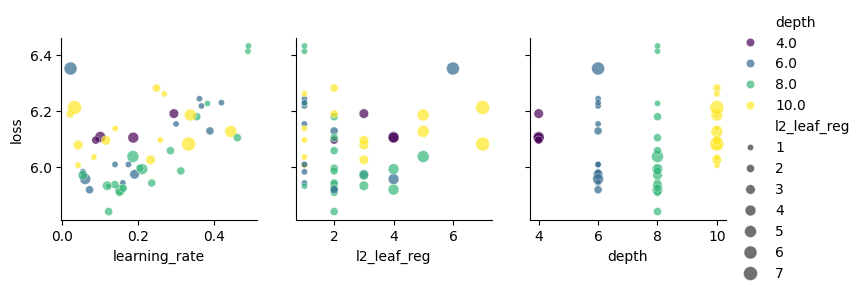

In [ ]:
# Визуализирум данные поиска оптимальных гиперпараметров.

g = sns.PairGrid(data=hp_results,
                 x_vars=['learning_rate', 'l2_leaf_reg', 'depth'],
                 y_vars=['loss'],
                 hue='depth',
                 palette='viridis'
                 )
g.map_offdiag(sns.scatterplot,
              # hue=hp_results.depth,
              size=hp_results.l2_leaf_reg,
              sizes=(20, 100),
              alpha=.7)
g.add_legend(title='',
             markerscale=1
             )
plt.show()

*Заметки:*
- Из парной диаграммы видно, что при глубине деревьев 6 и 8 значение MAE ниже 6 и алгоритм байесовской оптимизации hyperopt отдаёт предпочиение этим значениям (заметно больше точек на диаграмме);

____

In [ ]:
# # Запустим процесс подбора с гиперпараметров с использованием кросс-валидации
# # ТЕЖЕ ПРОБЛЕМЫ СКРОСС_ВАЛИДАЦИЕЙ КАК И ВЫШЕ

# def hyperopt_objective(params):
#   model = CatBoostRegressor(loss_function='RMSE',
#                             iterations=200,
#                             l2_leaf_reg=3,
#                             learning_rate=0.1,
#                             eval_metric='MAE',
#                             random_seed=42,
#                             verbose=False
#                             )
#   cv_data = cv(Pool(features_train, target_train),
#                model.get_params(),
#                logging_level='Silent',
#                )
#   best_mae = np.min(cv_data['test-MAE-mean'])

#   return best_mae

# params_space = {'l2_leaf_reg': hyperopt.hp.qloguniform('l2_leaf_reg', 0, 2, 1),
#                 'learning_rate': hyperopt.hp.uniform('learning_rate', 1e-3, 5e-1),
#                 }

# trials = hyperopt.Trials()

# best = hyperopt.fmin(
#     hyperopt_objective,
#     space=params_space,
#     algo=hyperopt.tpe.suggest,
#     max_evals=50,
#     trials=trials,
#     rstate=np.random.default_rng(seed=123)
# )

# print(best)

____

## Нейросеть

In [ ]:
# Предобработка данных

# Периведём данные в numpy массив
features_train_net = features_train.to_numpy()
target_train_net = target_train.to_numpy()
features_test_net = features_test.to_numpy()
target_test_net = target_test.to_numpy()

# Масштабирование и нормировка
# Вычислим среднее и стандартное отклонение на обучающей выборке
# и преобразуем (масштабируем и нормируем) её.
# (Можно использую методы StandardScaler или MinMaxScaler из библиотеки pandas
# и потом преобразовать в массив.)
mean = features_train_net.mean(axis=0)
X_train_net = features_train_net - mean
std = features_train_net.std(axis=0)
X_train_net /= std

# Создадим функцию масштабирования
def scaler(X):
  return (X - mean)/std  # mean и std из обучающей выборки

# Масштабируем и нормируем тестовую выборку
X_test_net = scaler(features_test_net)

# Нормировка целевого признака в диапазон (0, 1)
min_y = target_train_net.min()  # смещение
max_y = target_train_net.max()  # нормировка
y_train_net = target_train_net - min_y
y_train_net /= max_y

# Функция нормировки
def norm(y):
  return (y - min_y)/max_y  # min_y и max_y из обучающей выборки

y_test_net = norm(target_test_net)

# Потом нужно делать обратное преобразование результата: pred_slp = pred_slp*max_y + min_y
# Для метрики - MAE*max_y, тк min_y взаимовычитаются.



In [ ]:
# Инициализируем генератор случайных чисел сразу для всего (Python,Numpy, TF, ...)

set_random_seed(12345)

*Заметки:*
- На масштабированных данных нейронка быстрее учится! Алгоритм sgd и adam хорошо работает, когда данные около 0, и чем дальше тем хуже cходиться, поэтому масштабирование и нормировка обязательны.
- В выходном слое используется сигмойдная функция активации, поэтому целевой признак нормированы к диапазону [0, 1]. (По умолчанию после слоя Dense линейная функция linear и для неё вроде необязательно делать нормировку.)


____

### Двухслойный перcептрон (two-layer perceptron, с одним скрытым слоем)

#### Sigmoid

In [ ]:
# Построим медель с одним скрытым слоем и функцией активации sigmoid
# Количество нейронов подобранно по сходимости MAE

model_tlp_sigmoid = Sequential()  # Конструируем последовательную архитектуру нейронной сети
model_tlp_sigmoid.add(Dense(units=100,  # В скрытом слое задаём 100 нейронов
                            input_dim=X_train_net.shape[1], # Число входов в слое
                            activation='sigmoid',
                            name='input'))  # Входной слой в нейронках не учитывается, по факту это первый скрытый слой
model_tlp_sigmoid.add(Dense(units=1, activation='sigmoid', name='output'))

model_tlp_sigmoid.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (Dense)                        │ (None, 100)                 │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,701 (10.55 KB)

 Trainable params: 2,701 (10.55 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_tlp_sigmoid.compile(loss='mse',
                          optimizer='adam',
                          metrics=['mae'])
history_sigmoid = model_tlp_sigmoid.fit(X_train_net,
                                        y_train_net,
                                        epochs=100,
                                        validation_split=0.2,
                                        shuffle=True,
                                        verbose=0)
val_mae_sigmoid = history_sigmoid.history['val_mae'][-1]*max_y

print(f'MAE на валидационной выборке: {round(val_mae_sigmoid, 2)}')

MAE на валидационной выборке: 6.55


In [ ]:
# Визуализация сходимости функции потерь при обучении

fig = go.Figure()
fig.add_trace(go.Scattergl(y=history_sigmoid.history['loss'], name='Train'))
fig.add_trace(go.Scattergl(y=history_sigmoid.history['val_loss'], name='Valid'))
fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch', yaxis_title='Loss',
                  title='Loss convergence')
fig.update_yaxes(range=[0, max(history_sigmoid.history['val_loss'])])

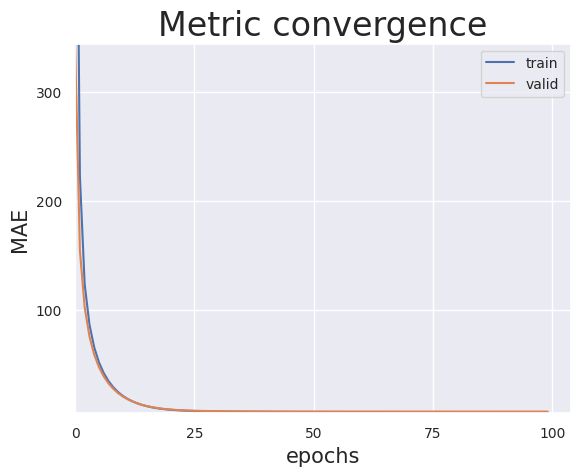

In [ ]:
# Визуализация сходимости MAE при обучении

mae_sigmoid_plot = np.array(history_sigmoid.history['mae'])*max_y
val_mae_sigmoid_plot = np.array(history_sigmoid.history['val_mae'])*max_y
plt.plot(mae_sigmoid_plot, label='train')
plt.plot(val_mae_sigmoid_plot, label='valid')
plt.title('Metric convergence')
plt.xlabel('epochs', fontsize=15)
plt.ylabel('MAE', fontsize=15)
plt.xticks(fontsize=10)
plt.xlim(left=0)
plt.ylim(5, round(max(val_mae_sigmoid_plot)))
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

In [ ]:
# Вычисление метрики MAE на тестовой выборке для примера

# pred_tlp_sigmoid = model_tlp_sigmoid.predict(X_test_net).flatten()  # Вместо метода flatten можно взять срез [:,0]
# pred_tlp_sigmoid_test = pred_tlp_sigmoid*max_y + min_y  # Делаем обратное преобразование
# mae_tlp_sigmoid_test = mean_absolute_error(target_test_net, pred_tlp_sigmoid_test)

# # Вычисление MAE без использования встроенной функции
# err = np.mean(abs(pred_tlp_sigmoid_test - target_test_net))

# # Обратное преобразование можно сделать после вычисления метрики
# mae_tlp_sigmoid_ = mean_absolute_error(y_test_net, pred_tlp_sigmoid)*max_y

# print(f'MAE на тестовой выборке: {round(mae_tlp_sigmoid_test, 2)}')

____

#### Tanh

In [ ]:
# Функция активации tanh

model_tlp_tanh = Sequential()
model_tlp_tanh.add(Dense(units=100, input_dim=X_train_net.shape[1],
                         activation='tanh', name='input'))
model_tlp_tanh.add(Dense(units=1, activation='sigmoid', name='output'))
model_tlp_tanh.compile(loss='mse', optimizer='adam', metrics=['mae'])
history_tanh = model_tlp_tanh.fit(X_train_net,
                                  y_train_net,
                                  epochs=100,
                                  validation_split=0.1,
                                  shuffle=True,
                                  verbose=0)
val_mae_tanh = history_tanh.history['val_mae'][-1]

print(f'MAE на валидационной выборке: {round(val_mae_tanh*max_y, 2)}')


MAE на валидационной выборке: 8.19


____

#### ReLu

In [ ]:
# Функция активации relu

model_tlp_relu = Sequential()
model_tlp_relu.add(Dense(units=100, input_dim=X_train_net.shape[1],
                         activation='relu', name='input'))
model_tlp_relu.add(Dense(units=1, activation='sigmoid', name='output'))
model_tlp_relu.compile(loss='mse', optimizer='adam', metrics=['mae'])
history_relu = model_tlp_relu.fit(X_train_net,
                                  y_train_net,
                                  epochs=100,
                                  validation_split=0.1,
                                  shuffle=True,
                                  verbose=0)
val_mae_relu = history_relu.history['val_mae'][-1]

print(f'MAE на валидационной выборке: {round(val_mae_relu*max_y, 2)}')

MAE на валидационной выборке: 11.75


---

#### Визуализация результатов

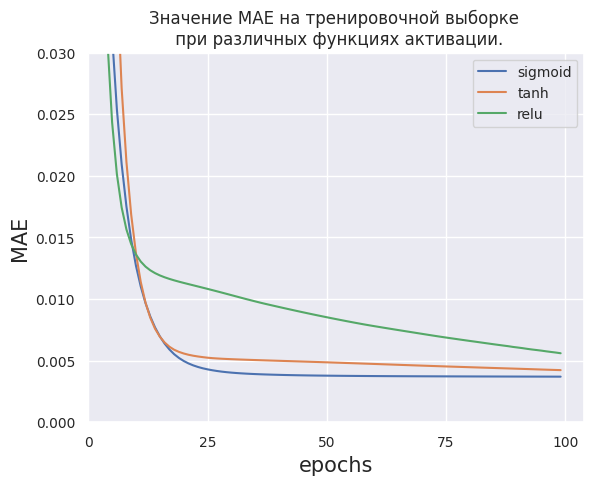

In [ ]:
# Сходимость MAE на тренировочной выборке при различных функциях активации.

plt.plot(history_sigmoid.history['mae'], label='sigmoid')
plt.plot(history_tanh.history['mae'], label='tanh')
plt.plot(history_relu.history['mae'], label='relu')
plt.title('Значение MAE на тренировочной выборке \n при различных функциях активации.', fontsize=12)
plt.xlabel('epochs', fontsize=15)
plt.ylabel('MAE', fontsize=15)
plt.xticks(fontsize=10)
plt.xlim(left=0)
plt.ylim(0, 0.03) # history_sigmoid.history['mae'][0])
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

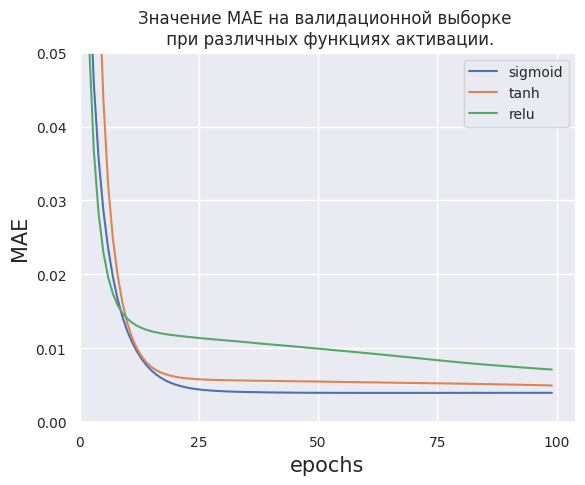

In [ ]:
# Сходимость MAE на валидационной выборке при различных функциях активации.
plt.plot(history_sigmoid.history['val_mae'], label='sigmoid')
plt.plot(history_tanh.history['val_mae'], label='tanh')
plt.plot(history_relu.history['val_mae'], label='relu')
plt.title('Значение MAE на валидационной выборке \n при различных функциях активации.', fontsize=12)
plt.xlabel('epochs', fontsize=15)
plt.ylabel('MAE', fontsize=15)
plt.xticks(fontsize=10)
plt.xlim(left=0)
plt.ylim(0, 0.05) #history_sigmoid.history['val_mae'][0])
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

*Заметки:*
- Процесс обучения модели быстрее и лучше сходится при использовании сигмойдной функции активации;
- Лучшее значение метрики также при сигмойде.

In [ ]:
# Добавим строку к фрейму с результатами

row_TLP = {'model': 'Two-lelayer perceptron',
           'mae': abs(round(val_mae_sigmoid, 2))}
df_results.loc[len(df_results.index)] = row_TLP
df_results

,model,mae
0,LinearRegression,6.53
1,KNeighborsRegressor,6.71
2,RandomForestRegressor,6.11
3,LGBMRegressor,6.10
4,CatBoostRegressor,5.84
5,Two-lelayer perceptron,6.55


---


### Полносвязная сеть (многослойный персептрон, multylayer perceptron)

In [ ]:
# Создадим класс для построения многослойной полносвязной сети.

use_saved_model = False
#use_saved_model = True

class MLP:
    def __init__(
        self,
        model_name='default_model',
        dense_neurons=[200, 100, 50]
    ):
        self.model_name = model_name
        self.dense_neurons = dense_neurons
        self.fit_params = {
            'epochs': 100,
            'validation_split': 0.2,
            'shuffle': True,
            'verbose': 0,
        }

    def get_data(
        self,
        X_train, y_train,
        X_test, y_test
    ):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        # Для масштабирования признаков
        self.mean = self.X_train.mean(axis=0)
        self.std = self.X_train.std(axis=0)
        # Для нормировки целевого признака
        self.min_y = self.y_train.min()
        self.max_y = self.y_train.max()
        # Работает если input_shape кортеж,
        # не зная почему однослойный персептрон выше работает c type(input_shape)=int.
        self.dense_input_shape = (self.X_train.shape[1],)

        print('Размер тренировочной выборки {}'.format(self.X_train.shape))
        print('Размер тестовой выборки {}'.format(self.X_test.shape))

    def data_split_train_test(
        self,
        X,
        y,
    ):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.3, random_state=1)
        print('self.X_train = {}'.format(self.X_train))
        print('self.X_test = {}'.format(self.X_test))
        print('self.y_train = {}'.format(self.y_train))
        print('self.y_test = {}'.format(self.y_test))
        print('training data row count = {}'.format(len(self.y_train)))
        print('test data row count = {}'.format(len(self.y_test)))

        X_train_data_shape = self.X_train.shape
        print('X_train_data_shape = {}'.format(X_train_data_shape))

    def scaler(self, X):  # функция масштабирования
        return (X - self.mean)/self.std

    def norm(self, y):  # функция нормировки целевого признака в диапазон (0, 1)
      return (y - self.min_y)/self.max_y  # min_y и max_y из обучающей выборки

    def get_model(
        self,
    ):
        self.model = Sequential()
        self.model.add(Dense(self.dense_neurons[0], input_shape=self.dense_input_shape,
                             activation='sigmoid', name='input')
                       )
        for i, n in enumerate(self.dense_neurons[1:]):
            self.model.add(Dense(n, activation='sigmoid', name='hidden_' + str(i+2)))
        self.model.add(Dense(1, activation='sigmoid', name='output'))
        self.model.compile(optimizer='adam', loss='mse', metrics=['mean_absolute_error'])
        self.model_summary()
        return self.model

    def model_summary(
        self,
    ):
        self.model.summary()

    def train(
        self,
        X_train=np.array(None),
        y_train=np.array(None),
        plot=False
    ):
        # Если X_train и y_train не заданы, то значения цепляются из метода get_data
        # или data_split_train_test
        if (X_train.any() and y_train.any()) is None:
          X_train=self.X_train
          y_train=self.y_train
        X_train = self.scaler(X_train)
        y_train = self.norm(y_train)

        history = self.model.fit(X_train, y_train, **self.fit_params)
        self.val_mae = history.history['val_mean_absolute_error'][-1]
        print(f'MAE на валидационной выборке: {round(self.val_mae*self.max_y, 2)}')

        if plot:
            # Визуализация сходимости функции потерь
            fig = go.Figure()
            fig.add_trace(go.Scattergl(y=history.history['loss'], name='Train'))
            fig.add_trace(go.Scattergl(y=history.history['val_loss'], name='Valid'))
            fig.update_layout(height=500, width=700,
                              xaxis_title='Epoch', yaxis_title='Loss',
                              title='Loss convergence')
            fig.update_yaxes(range=[0, max(history.history['val_loss'])])
            fig.show()
            # Визуализация сходимости метрики
            fig = go.Figure()
            fig.add_trace(go.Scattergl(y=np.array(history.history['mean_absolute_error'])*self.max_y, name='Train'))  # Ошибка на короткую запись 'mae'
            fig.add_trace(go.Scattergl(y=np.array(history.history['val_mean_absolute_error'])*self.max_y, name='Valid'))
            fig.update_layout(height=500, width=700,
                              xaxis_title='Epoch', yaxis_title='MAE',
                              title='Metric convergence')
            fig.update_yaxes(range=[min(np.array(history.history['mean_absolute_error']))*self.max_y,
                                    max(np.array(history.history['val_mean_absolute_error']))*self.max_y])
            fig.show()
        return self.val_mae*self.max_y, history

    def evaluate(
        self,
        X_test=np.array(None),
        y_test=np.array(None)
    ):
        if (X_test.any() and y_test.any()) is None:
          X_test=self.X_test
          y_test=self.y_test
        X_test = self.scaler(X_test)
        y_test = self.norm(y_test)
        mse_nn, mae_nn = np.array(self.model.evaluate(X_test, y_test))
        # print(f'Loss_MSE = {round(self.val_loss, 5)} and MAE = {round(self.val_mae, 5)} on valid data')
        # print(f'Loss_MSE = {round(mse_nn, 5)} and MAE = {round(mae_nn, 5)} on test data')
        return mse_nn, mae_nn

    def predict(
        self,
        X_test=np.array(None),
        y_test=np.array(None)
    ):
        if (X_test.any() and y_test.any()) is None:
          X_test=self.X_test
          y_test=self.y_test
        X_test = self.scaler(X_test)
        pred = self.model.predict(X_test)[:,0]
        pred = pred*self.max_y + self.min_y
        mae = mean_absolute_error(y_test, pred)
        print('MAE on test data: ', round(mae, 2))
        return pred

    def save_model(
        self
    ):
        self.model.save(self.model_name + ".keras")

    def load_saved_model(
        self,
    ):
        self.model = load_model(self.model_name + ".keras")
        return self.model


In [ ]:
# Создадим сеть с 4 слоями и обучим

mlp = MLP('multylayer_perceptron', dense_neurons=[50, 100, 50])
mlp.get_data(features_train_net,
             target_train_net,
             features_test_net,
             target_test_net)
model_mlp = mlp.get_model()
mlp.train(#features_train_net,
          #target_train_net,
          plot=True)

Размер тренировочной выборки (1746, 25)
Размер тестовой выборки (583, 25)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (Dense)                        │ (None, 50)                  │           1,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_2 (Dense)                     │ (None, 100)                 │           5,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_3 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,501 (44.93 KB)

 Trainable params: 11,501 (44.93 KB)

 Non-trainable params: 0 (0.00 B)

MAE на валидационной выборке: 6.82


(6.818480065092444, <keras.src.callbacks.history.History at 0x7dd7551198a0>)

In [ ]:
# Добавим строку к фрейму с результатами

row_MLP = {'model': 'Multylayer perceptron',
           'mae': abs(round(mlp.val_mae*mlp.max_y, 2))}
df_results.loc[len(df_results.index)] = row_MLP
df_results

,model,mae
0,LinearRegression,6.53
1,KNeighborsRegressor,6.71
2,RandomForestRegressor,6.11
3,LGBMRegressor,6.10
4,CatBoostRegressor,5.84
5,Two-lelayer perceptron,6.55
6,Multylayer perceptron,6.82


In [ ]:
# Для примера расчитаем MAE на тестовой выборке

mlp.evaluate()
prediction_mlp = mlp.predict(features_test_net, target_test_net)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1677e-05 - mean_absolute_error: 0.0041 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
MAE on test data:  6.71


In [ ]:
# Проверка созданного класса на сохранение и загрузку модели

mlp.save_model()
mlp.load_saved_model()

<Sequential name=sequential_3, built=True>

---

###Свёрточная сеть (convolution neural network)

In [ ]:
# Обучим модель с одним свёрточным слоем.

# Преобразуем данные для свёртки
X_train_conv = X_train_net.reshape(X_train_net.shape[0], X_train_net.shape[1], 1)
X_test_conv = X_test_net.reshape(X_test_net.shape[0], X_test_net.shape[1], 1)

model_cnn= Sequential()
model_cnn.add(Conv1D(5, 3,
                     padding='same',  # по умолчанию padding='valid',
                     strides=1, # по умолчанию
                     activation='relu', input_shape=(25,1), name='input'))
model_cnn.add(Flatten())
model_cnn.add(Dense(units=100, activation='sigmoid', name='hidden1'))
model_cnn.add(Dense(units=100, activation='sigmoid', name='hidden2'))
model_cnn.add(Dense(units=1, activation='sigmoid', name='output'))

model_cnn.compile(loss='mse', optimizer='adam', metrics=['mae'])
model_cnn.summary()

fit_params = {'epochs': 100,
              'validation_split': 0.2,
              'shuffle': True,
              'verbose': 0}

history_cnn = model_cnn.fit(X_train_conv, y_train_net, **fit_params)
val_mae_cnn = history_cnn.history['val_mae'][-1]*max_y
print(f'MAE на валидационной выборке: {round(val_mae_cnn, 2)}')

# Проверка на тестовой выборке
# pred_cnn = model_cnn.predict(X_test_conv)[:,0]
# pred_cnn = pred_cnn*max_y + min_y
# mae_cnn = mean_absolute_error(target_test_net, pred_cnn)
# mae_cnn

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (Conv1D)                       │ (None, 25, 5)               │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 125)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden1 (Dense)                      │ (None, 100)                 │          12,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden2 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,821 (89.14 KB)

 Trainable params: 22,821 (89.14 KB)

 Non-trainable params: 0 (0.00 B)

MAE на валидационной выборке: 6.22


In [ ]:
# Визуализация сходимости MAE при обучении

fig = go.Figure()
fig.add_trace(go.Scattergl(y=np.array(history_cnn.history['mae'])*max_y, name='Train'))
fig.add_trace(go.Scattergl(y=np.array(history_cnn.history['val_mae'])*max_y, name='Valid'))
fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch', yaxis_title='MAE',
                  title='Metric convergence')
fig.update_yaxes(range=[5, max(np.array(history_cnn.history['val_mae'])*max_y)])

In [ ]:
# Визуализация сходимости MAE при обучении

# mae_cnn_plot = np.array(history_cnn.history['mae'])*max_y
# val_mae_cnn_plot = np.array(history_cnn.history['val_mae'])*max_y
# plt.plot(mae_cnn_plot, label='train')
# plt.plot(val_mae_cnn_plot, label='valid')
# plt.title('Сходимсоть метрики', fontsize=12)
# plt.xlabel('epochs', fontsize=15)
# plt.ylabel('MAE', fontsize=15)
# plt.xticks(fontsize=10)
# plt.xlim(left=0)
# plt.ylim(5, round(max(val_mae_cnn_plot)))
# plt.yticks(fontsize=10)
# plt.legend(fontsize=10)
# plt.show()

In [ ]:
# Добавим строку к фрейму с результатами

row_CNN = {'model': 'Convolution neural network',
           'mae': abs(round(val_mae_cnn, 2))}
df_results.loc[len(df_results.index)] = row_CNN
df_results



,model,mae
0,LinearRegression,6.53
1,KNeighborsRegressor,6.71
2,RandomForestRegressor,6.11
3,LGBMRegressor,6.10
4,CatBoostRegressor,5.84
5,Two-lelayer perceptron,6.55
6,Multylayer perceptron,6.82
7,Convolution neural network,6.22


---

### Сеть с архитектурой LeNet


In [ ]:
# Обучим модель с одним сверточным слоем и пулингом

model_lenet= Sequential()
model_lenet.add(Conv1D(5, 3,
                       padding='same',  # по умолчанию padding='valid'
                       strides=1, # по умолчанию
                       activation='relu', input_shape=(25,1), name='input'))
model_lenet.add(AvgPool1D(pool_size=2,
                          padding='same',  # по умолчанию padding='valid'
                          strides=None, # по умолчанию
                          ))
model_lenet.add(Conv1D(15, 3, activation='relu', name='hidden1'))
model_lenet.add(Flatten())
model_lenet.add(Dense(units=100, activation='sigmoid', name='hidden2'))
model_lenet.add(Dense(units=1, activation='sigmoid', name='output'))

model_lenet.compile(loss='mse', optimizer='adam', metrics=['mae'])
model_lenet.summary()

fit_params = {'epochs': 100,
              'validation_split': 0.2,
              'shuffle': True,
              'verbose': 0}

history_lenet = model_lenet.fit(X_train_conv, y_train_net, **fit_params)
val_mae_lenet = history_lenet.history['val_mae'][-1]*max_y

print(f'MAE на валидационной выборке: {round(val_mae_lenet, 2)}')

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (Conv1D)                       │ (None, 25, 5)               │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling1d (AveragePooling1D) │ (None, 13, 5)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden1 (Conv1D)                     │ (None, 11, 15)              │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 165)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden2 (Dense)                      │ (None, 100)                 │          16,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

MAE на валидационной выборке: 6.47


In [ ]:
# Визуализация сходимости MAE при обучении

fig = go.Figure()
fig.add_trace(go.Scattergl(y=np.array(history_lenet.history['mae'])*max_y, name='Train'))
fig.add_trace(go.Scattergl(y=np.array(history_lenet.history['val_mae'])*max_y, name='Valid'))
fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch', yaxis_title='MAE',
                  title='Metric convergence')
fig.update_yaxes(range=[5, max(np.array(history_lenet.history['val_mae'])*max_y)])

In [ ]:
# Визуализация сходимости MAE при обучении

# mae_lenet_plot = np.array(history_lenet.history['mae'])*max_y
# val_mae_lenet_plot = np.array(history_lenet.history['val_mae'])*max_y
# plt.plot(mae_lenet_plot, label='train')
# plt.plot(val_mae_lenet_plot, label='valid')
# plt.title('Сходимсоть метрики', fontsize=12)
# plt.xlabel('epochs', fontsize=15)
# plt.ylabel('MAE', fontsize=15)
# plt.xticks(fontsize=10)
# plt.xlim(left=0)
# plt.ylim(5, round(max(val_mae_lenet_plot)))
# plt.yticks(fontsize=10)
# plt.legend(fontsize=10)
# plt.show()

In [ ]:
# Добавим строку к фрейму с результатами

row_LeNet = {'model': 'LeNet',
             'mae': abs(round(val_mae_lenet, 2))}
df_results.loc[len(df_results.index)] = row_LeNet
df_results

,model,mae
0,LinearRegression,6.53
1,KNeighborsRegressor,6.71
2,RandomForestRegressor,6.11
3,LGBMRegressor,6.10
4,CatBoostRegressor,5.84
5,Two-lelayer perceptron,6.55
6,Multylayer perceptron,6.82
7,Convolution neural network,6.22
8,LeNet,6.47


*Заметки:*
- Значение метрики для нейросетей очень сильно зависит от выбра числа нейронов в слоях и выбора архитектуры;
- Значение метрики для полносвязной сетки с двумя слоями близко к линейной модели LinearRegression;
- Для многослойной полносвязной сетки получается стабильно плохой результат (лучшие результаты при небольшом количестве нейронов в слоях), что свидетельствует о переобучении;
- Для модели с архитектурой LeNet получается результат заметно хуже чем для сверточной сети, что объяснимо использованием усреднения,так как у нас изначально немного признаков и их уменьшение приводит к потери информации.

---

## Выбор лучшей модели

In [ ]:
# Вывод таблицы с результатами

df_results

,model,mae
0,LinearRegression,6.53
1,KNeighborsRegressor,6.71
2,RandomForestRegressor,6.11
3,LGBMRegressor,6.10
4,CatBoostRegressor,5.84
5,Two-lelayer perceptron,6.55
6,Multylayer perceptron,6.82
7,Convolution neural network,6.22
8,LeNet,6.47


Выводы:<br>
Согласно таблице выше лучшая метрика получается для модели градиентного бустинга CatBoost, но модели LGBMRegressor и RandomForestRegressor тоже показывают хорошие результаты, стоит проверить на тестовой выборке все 3 модели и сравнить время обучения.

---

# Проверка модели

## Тестирование лучшей модели

In [ ]:
# Модель случайного леса лучшими гиперпараметрами

start_time = time.time()

# Обуим модель
model_RFR_test = RandomForestRegressor(max_depth=10,
                                       n_estimators=400,
                                       random_state=123).\
                                            fit(features_train,
                                                target_train)
# Проверка на тестовой выборке
pred_test_rfr = model_RFR_test.predict(features_test)
mae_test_rfr = mean_absolute_error(target_test, pred_test_rfr)

elapsed_fit_time_rfr = time.time() - start_time

# Собирём датафрейм с результатами

test_results = pd.DataFrame(columns=['model', 'mae', 'time'])
row_RFR_test = {'model': 'RandomForestRegressor',
                'mae': round(mae_test_rfr, 2),
                'time': round(elapsed_fit_time_rfr, 2)}
test_results.loc[len(test_results.index)] = row_RFR_test
test_results



,model,mae,time
0,RandomForestRegressor,6.2,4.55


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[78]	train's l1: 5.48311	train's l2: 54.5484	test's l1: 6.25596	test's l2: 76.3081


,model,mae,time
0,RandomForestRegressor,6.20,4.55
1,LGBMRegressor,6.26,0.05


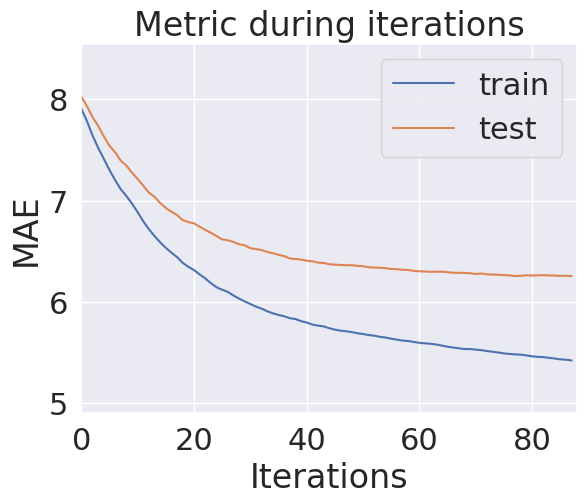

In [ ]:
# Модель бустинга LGBMRegressor с лучшими гиперпараметрами

start_time = time.time()

# Обучим модель

boost_LGB_test = lgb.LGBMRegressor(learning_rate=0.1,
                                   num_leaves=5,
                                   n_estimators=100,
                                   random_state=12345,
                                   verbose=-1,
                                   num_iterations=100)
eval_result = {}
regr_LGB_test = boost_LGB_test.fit(features_train, target_train,
                         eval_set=[(features_train, target_train),
                                   (features_test, target_test)],
                         eval_names=["train", "test"],
                         eval_metric=["mae"],
                         callbacks=[lgb.early_stopping(stopping_rounds=10),
                                    lgb.record_evaluation(eval_result)]
                         )
# # Посмотрим результаты ранней остановки.
# print(f'Число итераций: {regr_LGB_test.best_iteration_} \n'
#       f'Значения метрик последней итерации: {list(regr_LGB_test.best_score_.items())[1]}')

pred_lgb_test = boost_LGB_test.predict(features_test,
                                      #  num_iteration=80
                                       )
mae_lgb_test = mean_absolute_error(target_test, pred_lgb_test)

elapsed_fit_time_lgb = time.time() - start_time

# Визуализация сходимости MAE

lgb.plot_metric(boost_LGB_test, metric="l1",
                title="Metric during iterations",
                ylabel='MAE')

# Добавим результат в итоговую таблицу

row_LGB_test = {'model': 'LGBMRegressor',
                'mae': round(mae_lgb_test, 2),
                'time': round(elapsed_fit_time_lgb, 2)}
test_results.loc[len(test_results.index)] = row_LGB_test
test_results

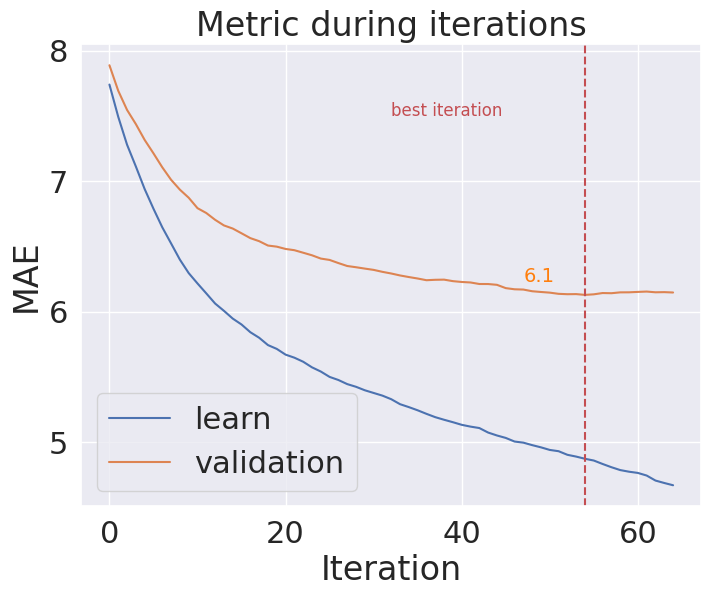

,model,mae,time
0,RandomForestRegressor,6.20,4.55
1,LGBMRegressor,6.26,0.05
2,CatBoostRegressor,6.13,0.69


In [ ]:
# Модель бустинга CatBoostRegressor с лучшими гиперпараметрами

start_time = time.time()

# Обучим модель

booster_CAT_test = CatBoostRegressor(loss_function='RMSE',
                                     iterations=500,  # (n_estimators) по умолчанию 1000
                                     learning_rate=0.12,  # (eta) по умолчанию 0.03
                                     depth=8,  # по умолчанию 6
                                     l2_leaf_reg=2,  # по умолчанию 3
                                     eval_metric='MAE',  # Контролирует переобучение
                                     random_seed=42,
                                     early_stopping_rounds=10,
                                     logging_level='Silent',  # тоже что verbose=False
                                     use_best_model=True  # Если True при перезапуске модели используется best_itaration_
                                     )
booster_CAT_test.fit(features_train, target_train,
                     eval_set=(features_test, target_test),
                     )
pred_cat = booster_CAT_test.predict(features_test)
mae_cat_test = mean_absolute_error(target_test, pred_cat)

elapsed_fit_time_cat = time.time() - start_time

# Визуализация сходимости MAE

evals_result_cat = booster_CAT_test.get_evals_result()
best_iter_cat = booster_CAT_test.get_best_iteration()
best_valid_score_cat = booster_CAT_test.get_best_score()['validation']['MAE']

plt.figure(figsize=(8,6))
plt.plot(evals_result_cat['learn']['MAE'])
plt.plot(evals_result_cat['validation']['MAE'])
plt.legend(['learn', 'validation'])
plt.title('Metric during iterations')
plt.xlabel('Iteration')
plt.ylabel('MAE')
plt.axvline(best_iter_cat, c='r', linestyle='--')
plt.text(best_iter_cat - 22, 7.5, 'best iteration', fontsize=12, c='r')
plt.text(best_iter_cat - 7, best_valid_score_cat + .1, round(best_valid_score_cat, 1),
         fontsize=14, c=plt.get_cmap("tab10").colors[1])
plt.show()

# Добавим результат в итоговую таблицу

row_CAT_test = {'model': 'CatBoostRegressor',
                'mae': round(mae_cat_test, 2),
                'time': round(elapsed_fit_time_cat, 2)}
test_results.loc[len(test_results.index)] = row_CAT_test
test_results


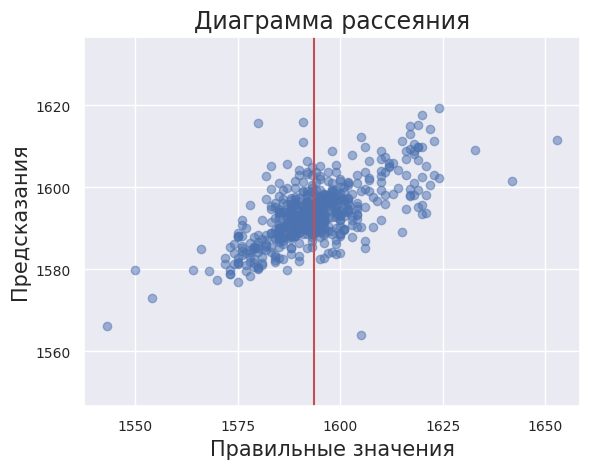

In [ ]:
# Диаграмма рассеяния для предсказаний модели CatBoost

plt.scatter(target_test, pred_cat, alpha=0.5)
plt.title('Диаграмма рассеяния', fontsize=17)
plt.xlabel('Правильные значения', fontsize=15)
plt.ylabel('Предсказания', fontsize=15)
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.axvline(target_test.mean(), c='r')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

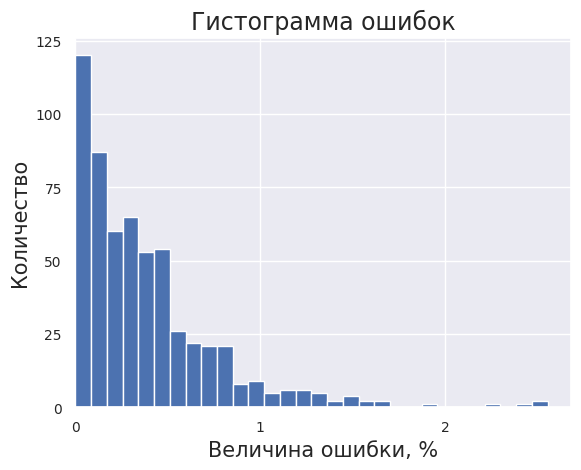

Количесто предсказаний с ошибкой больше 1%: 2.6%
Количество предсказаний с ошибкой больше 2%: 0.2%


In [ ]:
# Гистограмма ошибок

error = (pred_cat - target_test)*100/target_test

plt.hist(abs(error), bins=30)
plt.xlabel('Величина ошибки, %', fontsize=15)
plt.ylabel('Количество', fontsize=15)
plt.title('Гистограмма ошибок', fontsize=17)
plt.xticks(fontsize=10)
plt.xlim(left=0)
plt.yticks(fontsize=10)
plt.show()

error_1 = len([i for i in error if i > 1])
error_2 = len([i for i in error if i > 2])
print(f'Количесто предсказаний с ошибкой больше 1%: {error_1/len(error):.1%}')
print(f'Количество предсказаний с ошибкой больше 2%: {error_2/len(error):.1%}')

*Заметки:*<br>
Из диаграмы рассения и гистограмы ошибок видно, что ошибки лежат кучно и только несколько точек выпадают из общей картины.

---

## Выводы

- Лучший результат на тестовой выборке показала модель градиентного бустинга CatBoostRegressor (MAE 6.15), при этом она занимает второе место по скорости обучения (около 0.6с);
- Лидер по скорости обучения - модель градиентного бустинга LGBMRegressor (менее 0.06с), но проигрывает двум другим моделям по точности предсказания (MAE около 6.26);
- Среднюю позицию по точности занимает модель случайного леса RandomForestRegressor (MAE около 6.20), но заметно проигрывает по скорости обучения (около 4.54с).


## Отчёт

***Цель:*** Оптимизировать производственные расходы металлургического комбината и уменьшить потребление электроэнергии на этапе обработки стали.

***Задача:*** Построить модель, которая способна предсказать температуру сплава в конце процесса обработки стали.

***Основновные шаги выполненные согласно плану проекта:***
* Загрузка данных и получение общей информации о предоставленных таблицах (data_temp, data_arc, data_gas, data_bulk, data_wire, data_bulk_time и data_wire_time).
* Анализ и предобработка данных:
  - В таблице data_temp в столбце 'Время замера' пропусков нет, а в столбце 'Температура' много (около 20%), строки с пропусками удалили;
  - В среднем 5 замеров температуры в одной партии;
  - Есть строки с заметно более низкими значениями температуры, расценили их как выбросы и удалили, в качестве порога использовалась температура плавления стали (1400 град);
  - Начальная сплава имеет распределение близкое к нормальному (среднее значение (1589 +- 25) град., медианное значение 1588 град.);
  - Конечная температура сплава (целевой признак) также имеет распределение близкое к нормальному (среднее значение (1595 +- 16) град., медианное значение 1593 град.);
  - Наиболее важную информацию несёт начальная температура, использовали её в качестве обучающего признака;
  - Из таблицы данных об электродах data_arc вытащили продолжительнсть работы и мощность, расчитали полную работу и добавили в датасет обучающих признаков;
  - В талице data_arc встречается одно отрицательное значение реактивной мощности, заменили его на значение, пропорциональное паре значений активная и реактивная мощность предшествующих по времени из той же партии.
  - Данные о продувке газом data_gas не имеют пропусков и выбросов, в среднем в партии используется 10 у.е. газа, добавили в датасет обучающих признаков;
  - Время внесения сыпучих добавок и проволки не несёт полезной информации (важно только количество внесённых добавок), поэтому данные из таблицы с временем data_bulk_time и data_wire_time не использовались;
  - Данные о сыпучих добавках data_bulk и проволке wire имеют пропуски, заполнили их нулями и добавили в датасет обучающих признаков.
* Проверка обучающего датасета:
  - Признак Wire 5 был удалён, так как в итоговый датасет не попало ни одного значения;
  - Проверка на мультиколлениарность показала сильную связь конечной температурой c начальной температурой, работой дуги и добавками "Bulk 12", "Bulk 15", "Wire 1";
  - Также есть сильная корреляция между "Bulk 9" и "Wire 8", возможно эти добавки вносятся вместе;
  - VIF-анализ подтвердил сильную корреляция между "Bulk 9" и "Wire 8", таких событий немного, удалили признак "Wire 8";
  - Анализ значимости признаков с помощью F-тест согласуется с предидущими результатами: наиболее важные признаки - in_temp, work и добавки вносимые в больших объёмах (Bulk 12, Bulk 14, Wire 1);    
  - В итоговый датасет вошло 26 признаков и 2329 партий (тестовая выборка равна 25% от итогового датасета, а валидационная - 20% от тренировочной выборки).
* Используемые модели обучения:
    1. Модель линейной регрессии LinearRegression;
    2. Модель ближайших соседей KNeighborsRegressor (лучшие гиперпараметры: n_neighbors = 12);
    3. Модель случайного леса RandomForestRegressor (лучшие гиперпараметры: n_estimators = 400, max_depth = 10);
    4. Модель градиентного бустинга LightGBM (лучшие гиперпараметры: num_leaves = 5, n_estimators = 100, learning_rate = 0.01);
    5. Модель градиентного бустинга CatBoost (лучшие гиперпараметры: depth = 8, l2_leaf_reg = 2, learning_rate = 0.12);
    6. Модель двухслойной полносвязной нейросети (в скрытом слое 100 нейронов);
    7. Модель многослойной полносвязной нейросети (3 скрытых слоя по 200, 100, 50 нейронов);
    8. Модель сверточной нейросети (3 скрытых слоя - 1 сверточный (5 филтров с ядром 3) и 2 полносвязных слоя по 100 нейронов);
    9. Модель нейросети с архитектурой LeNet (3 скрытых слоя - 2 сверточных (5 филтров с ядром 3 и усреднение с шагом 2, 15 филтров с ядром 3) и 1 полносвязный слой 100 нейронов).
    
* Результаты проверки моделей на валидационной выборке.

Валидационная выборка составляет 20% от тренировочной выборки.

|   | model | MAE |
|---|---:|---:|
| 1 | LinearRegression  |  6.53 |
| 2 | KNeighborsRegressor | 6.71 |
| 3 | RandomForestRegressor |  6.11 |
| 4 | LGBMRegressor  |  6.10 |
| 5 | CatBoostRegressor |  5.84 |
| 6 | Two-lelayer perceptron |  6.55 |
| 7 | Multylayer perceptron |  6.82 |
| 8 | Convolution neural network |  6.22 |
| 9 | LeNet |  6.47 |

Лучшие результаты показали модели градиентного бустинга LGBMRegressor и CatBoostRegressor, а такжк хороший результат у модели случайного леса RandomForestRegressor.

* Анализ значимости признаков:
  - Для моделе линейной регрессии методы Ridge regression, Permutation feature importance и сравнение с шумовым признаком однозначно показывают, что наиболее важные признаки "in_temp", "work" и "Wire_4" (также важны "Bulk_1", "Wire_2", "Wire_1", "Bulk_13", "Bulk_6", а наименее важен "Wire_3");
  - Для моделе случайного леса методы Feature importances, Permutation feature importance и сравнение с шумовым признаком однозначно показывают, что наиболее важные признаки "in_temp", "work" и "Wire_1" (также важны "Bulk_6","Bulk_15", "gas", "Wire_2", "Bulk_12", "Bulk_14", а наименее важен "Bulk_8");
  - Результаты для молделей линейной регресии и случайного леса однозначно согласуются только в важности признаков "in_temp" и "work", а в остальных признаках есть неоднозначность: например, для модели линейной регресии в топ 3 признаков входит "Wire_4", а для случайного леса эта добавка не попадает в топ 10;
  - Анализ значимости признаков для моделей градиентного бустинга LGBMRegressor и CatBoostRegressor имеет такие же результаты как и модель случайного леса, что ожидаемо;
  - Результаты для моделей решающих деревьев хорошо согласуются с результатами проверки датасета на мультиколлениарность.
   
* Результаты поверка на тестовой выборке.

Тестовая выборка составляет 25% от итого датасета. На тестовой выборке проверялись 3 модели, показавшие лучшие результаты - RandomForestRegressor, LGBMRegressor, CatBoostRegressor. Результаты собраны в таблицу, также добавлен столбец "время обучения модели".
  
|   | model | MAE | time |
|---|---:|---:|---:|
| 3 | RandomForestRegressor |  6.20 | 4.55 |
| 4 | LGBMRegressor  |  6.26 | 0.05 |
| 5 | CatBoostRegressor |  6.13 | 0.69 |

Лучший результат показала модель градиентного бустинга CatBoostRegressor, при этом она занимает второе место по скорости обучения. Лидер по скорости обучения - модель градиентного бустинга LGBMRegressor, но проигрывает двум другим моделям по точности предсказания. Среднюю позицию по точности занимает модель случайного леса RandomForestRegressor, но заметно проигрывает по скорости обучения.    
    
***Вывод:***
В качестве модели предсказания температуры стали в конце этапа обработки рекомендуется использовать модель градиентного бустинга CatBoostRegressor, так как она имеет заметно лучшее значение MAE и довольно быстро обучается.
     
***Рекомендации:***
- Выяснить у заказчика о взаимосвязи между вносимыми добавками.